In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import pandas as pd

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [1465]:
jordan = pd.read_stata('/Users/feliperodriguez/Desktop/ECON-628-01-felipe1504/Project 1/data set.dta')

In [1466]:
###This data set contains information about socioeconomic conditions of Syrian Refugee families living in Jordan
###The main objective of the current research is to compare the socieconomic situation of the Syrian families living
###in two very different environments in Jordan: Zaatari Refugee Camp and non-camp communities.

In [1467]:
### We begin  by describing the data

In [1468]:
jordan.describe().T


,count,mean,std,min,25%,50%,75%,max
id,391.0,196.000000,113.016223,1.000000,98.500000,196.000000,293.500000,391.000000
no1,134.0,67.500000,38.826537,1.000000,34.250000,67.500000,100.750000,134.000000
no2,257.0,129.000000,74.333707,1.000000,65.000000,129.000000,193.000000,257.000000
age,391.0,38.974425,13.061957,16.000000,29.000000,37.000000,47.000000,88.000000
genderf1m2,391.0,1.644501,0.479277,1.000000,1.000000,2.000000,2.000000,2.000000
familysize,391.0,5.030691,2.434597,1.000000,3.000000,5.000000,7.000000,14.000000
medicalconditionofoneofthemember,391.0,0.283887,0.451461,0.000000,0.000000,0.000000,1.000000,1.000000
happiness,389.0,4.876607,2.704558,1.000000,2.000000,5.000000,7.000000,10.000000
optimism,390.0,5.771795,2.917322,1.000000,4.000000,6.000000,8.000000,10.000000
totalincomesyriadollars,343.0,316.600983,352.486511,16.944000,113.355007,211.800003,363.000000,2722.500000


In [1469]:
### We want to know how many variables and observation we have in this data set

In [1470]:
print jordan.shape

(391, 33)


In [1471]:
### The we want to know the type of variables we have in this data set

In [1472]:
print jordan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 33 columns):
id                                  391 non-null int16
no1                                 134 non-null float64
no2                                 257 non-null float64
samplegroup                         391 non-null category
age                                 391 non-null int8
education                           391 non-null object
genderf1m2                          391 non-null int8
familysize                          391 non-null int8
medicalconditionofoneofthemember    391 non-null int8
happiness                           389 non-null float64
optimism                            390 non-null float64
totalincomesyriadollars             343 non-null float32
totalincomejordandollars            365 non-null float32
totalexpensesyriadollar             365 non-null float32
totalexpensesjordandollars          365 non-null float32
increaseworkingtimedummy            383 non-null float

In [1473]:
jordan.head()

,id,no1,no2,samplegroup,age,education,genderf1m2,familysize,medicalconditionofoneofthemember,happiness,...,reqassistancedummy,sellassetsdummy,redexeducdummy,tottime,JobFatherSyria,secfam_nm,persec_nm,perint_nm,PlaceOfOrigin,treatment
0,391,NaN,257.0,Refugee Camp,25,Middle school,1,5,0,9.0,...,0.0,0.0,0.0,3.666667,Blue Collar,5.0,5.0,10.0,1.0,0.0
1,390,NaN,256.0,Refugee Camp,56,Illiterate,1,1,0,4.0,...,1.0,1.0,1.0,4.000000,Blue Collar,5.0,5.0,6.0,1.0,0.0
2,389,NaN,255.0,Refugee Camp,43,Middle school,2,10,0,7.0,...,0.0,1.0,1.0,4.000000,Blue Collar,5.0,5.0,10.0,1.0,0.0
3,388,NaN,254.0,Refugee Camp,44,Middle school,2,7,1,8.0,...,0.0,0.0,0.0,3.500000,White Collar,4.0,4.0,9.0,1.0,0.0
4,387,NaN,253.0,Refugee Camp,37,Middle school,2,3,1,6.0,...,1.0,0.0,1.0,4.000000,Blue Collar,3.0,4.0,8.0,1.0,0.0


In [1474]:
### We know that the are some variables that are not useful for the current analysis

In [1475]:
### We drop some of the observations we might not use

In [1476]:
jordan.drop(['id','no1','no2'], axis=1, inplace=True)

In [1477]:
jordan.head()

,samplegroup,age,education,genderf1m2,familysize,medicalconditionofoneofthemember,happiness,optimism,totalincomesyriadollars,totalincomejordandollars,...,reqassistancedummy,sellassetsdummy,redexeducdummy,tottime,JobFatherSyria,secfam_nm,persec_nm,perint_nm,PlaceOfOrigin,treatment
0,Refugee Camp,25,Middle school,1,5,0,9.0,10.0,453.750000,140.548004,...,0.0,0.0,0.0,3.666667,Blue Collar,5.0,5.0,10.0,1.0,0.0
1,Refugee Camp,56,Illiterate,1,1,0,4.0,3.0,272.250000,28.109600,...,1.0,1.0,1.0,4.000000,Blue Collar,5.0,5.0,6.0,1.0,0.0
2,Refugee Camp,43,Middle school,2,10,0,7.0,6.0,544.500000,281.096008,...,0.0,1.0,1.0,4.000000,Blue Collar,5.0,5.0,10.0,1.0,0.0
3,Refugee Camp,44,Middle school,2,7,1,8.0,6.0,388.300018,742.093445,...,0.0,0.0,0.0,3.500000,White Collar,4.0,4.0,9.0,1.0,0.0
4,Refugee Camp,37,Middle school,2,3,1,6.0,7.0,544.500000,196.767197,...,1.0,0.0,1.0,4.000000,Blue Collar,3.0,4.0,8.0,1.0,0.0


In [1478]:
### Now we proceed to look at the distribution of our main variables of interest

###In the first section we are analysing does variables that allow us to conclude that different sample groups we have 
###Use to have in average the same socieconomic characteristics in Syria

In [1479]:
#### We begin our analysis with the distribution of aged among the heads of household of the entire sample

Mean of age:  38.9744245524


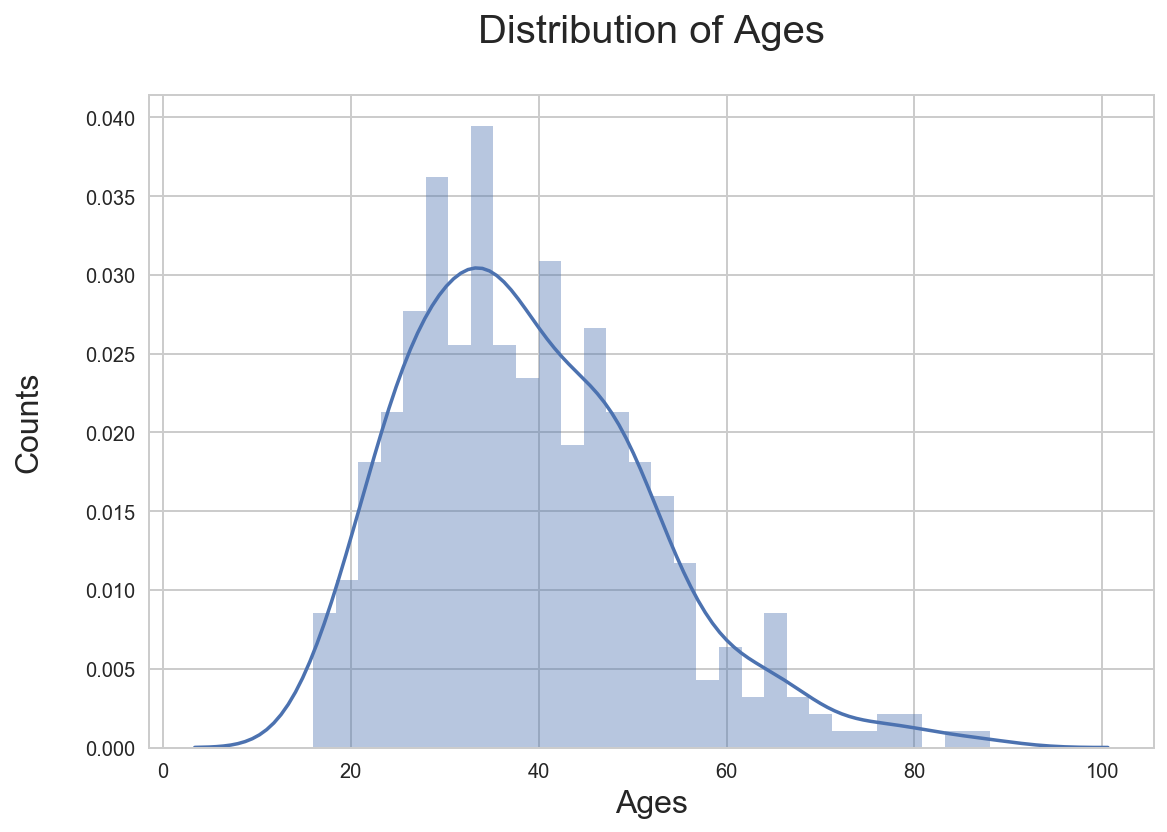

In [1480]:
mean_age = np.mean(age)

print 'Mean of age: ', mean_age

age = jordan.age.values
fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(age, bins=30, hist=True, kde=True,
                  ax=ax)

ax.set_ylabel('Counts\n', fontsize=16)
ax.set_title('Distribution of Ages\n', fontsize=20)
ax.set_xlabel('Ages', fontsize=16)

plt.show()

In [1481]:
### We can see that most of the heads of household in our sample are close to reach the forties

In [1482]:
### Now we take a loof at the distribution of genders 

In [1483]:
jordan.genderf1m2=jordan.genderf1m2.apply(lambda x:"Female" if x==1 else "Male" if x==2 else x)

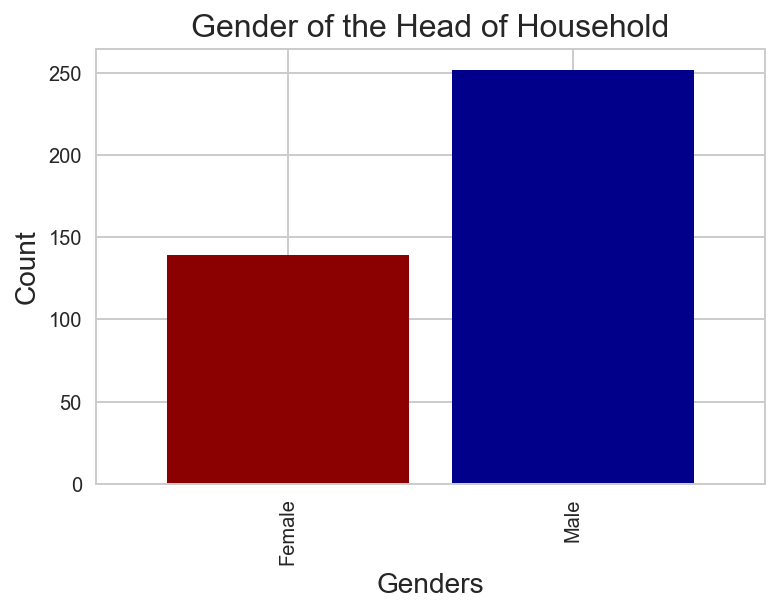

In [1484]:
jordan.groupby("genderf1m2").size().plot(kind="bar", color=["darkred", "darkblue"], width=0.85)

plt.xlabel("Genders", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Gender of the Head of Household", fontsize=16)
plt.show()

In [1485]:
### Most of heads of household in our sample are men

In [1486]:
#### Now we take a look at the family size

Family size :  5.03069053708


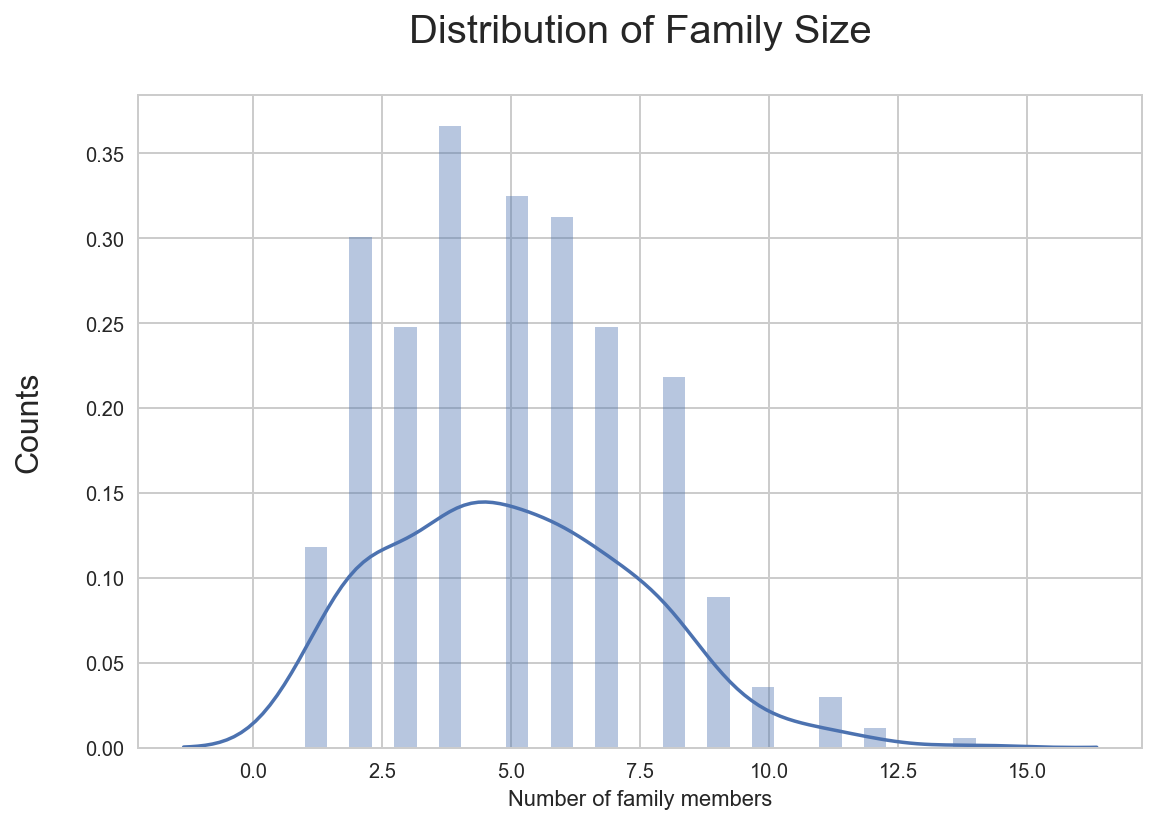

In [1487]:
mean_famsize = np.mean(jordan.familysize)

print 'Family size : ', mean_famsize

Familysize = jordan.familysize.values
fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(jordan.familysize, bins=30, hist=True, kde=True,
                  ax=ax)

ax.set_ylabel('Counts\n', fontsize=16)
ax.set_title('Distribution of Family Size\n', fontsize=20)
ax.set_xlabel('Number of family members')

plt.show()

In [1488]:
### Most of the families of our sample are compose by 5 members

In [1489]:
### Now we take a look at the levels of education of the heads of household

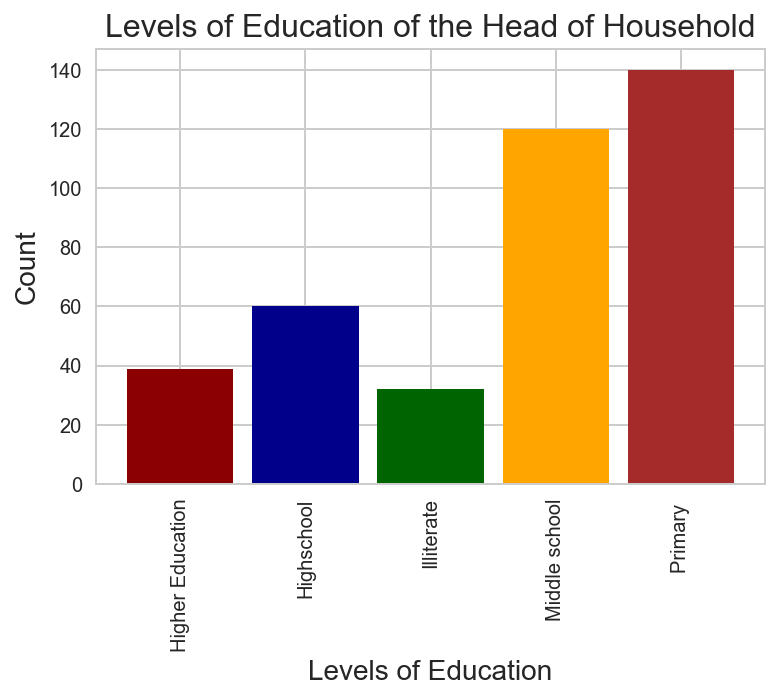

In [1490]:
jordan.groupby("education").size().plot(kind="bar", color=["darkred", "darkblue", "darkgreen", "orange", "brown"], width=0.85)

plt.xlabel("Levels of Education", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Levels of Education of the Head of Household", fontsize=16)
plt.show()

In [1491]:
### We can see that most the heads of household of our entire population have only reached Elementary or Middle School

In [1492]:
### Now we take a look a the presence of savings in the family in Syria, we use savings as a measure of wealth

In [1493]:
jordan.savingsdummy=jordan.savingsdummy.apply(lambda x:"Yes" if x==1 else "No" if x==0 else x)

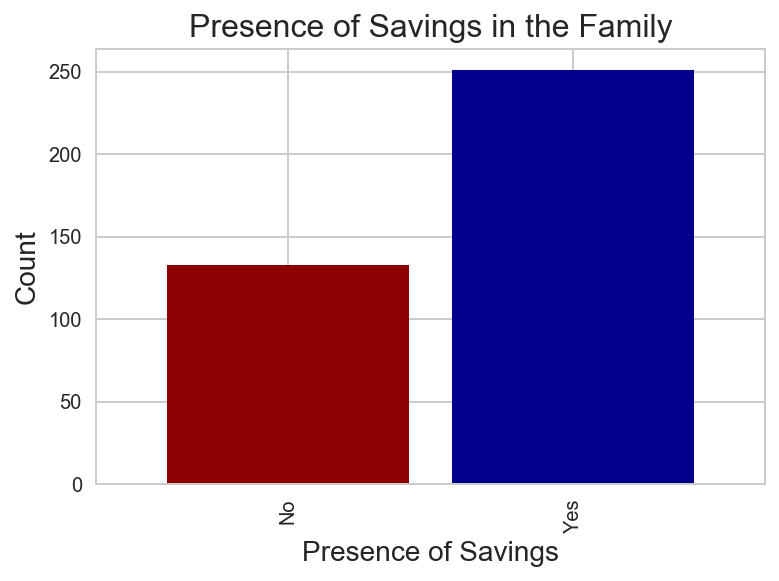

In [1494]:
jordan.groupby("savingsdummy").size().plot(kind="bar", color=["darkred", "darkblue"], width=0.85)

plt.xlabel("Presence of Savings", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Presence of Savings in the Family", fontsize=16)
plt.show()

In [1495]:
### We are surprised to see that even though most of the heads of households have only reached Elementary or
### Middle School, they have enough income to save 

In [1496]:
### Now we look at the place of oring of the Syrian families

In [1497]:
jordan.PlaceOfOrigin=jordan.PlaceOfOrigin.apply(lambda x:"Daraa" if x==1 else "North" if x==2 else "Central" if x==3 else "South" if x==4 else x)

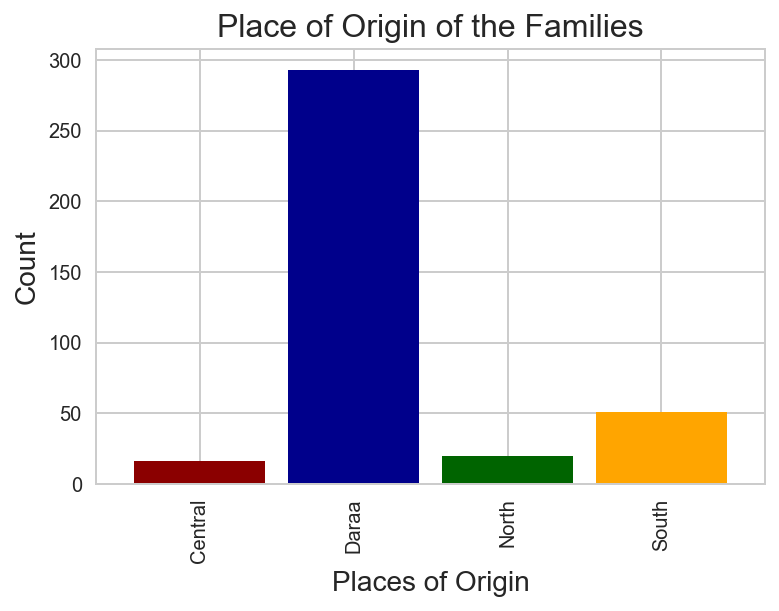

In [1498]:
jordan.groupby("PlaceOfOrigin").size().plot(kind="bar", color=["darkred", "darkblue", "darkgreen", "orange"], width=0.85)

plt.xlabel("Places of Origin", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title('Place of Origin of the Families', fontsize=16)
plt.show()

In [1499]:
### Most of the people of our sample are from Daraa, which is the closest Governorate of Syria to Jordan.
### In other words, if a Syrian family that lives in Daraa decides to escape from Syrian the less risky 
## alternative would certainy be Jordan.

In [1500]:
### Now we take a look at the levels of income in Syria

In [1501]:
print jordan.totalincomesyriadollars

0       453.750000
1       272.250000
2       544.500000
3       388.300018
4       544.500000
5       726.000000
6       998.250000
7              NaN
8       141.199997
9       580.799988
10      247.100006
11      363.000000
12      211.800003
13      544.500000
14      907.500000
15      726.000000
16       84.720001
17       66.840004
18       66.840004
19       35.299999
20      417.750000
21       83.550003
22      141.199997
23       44.560001
24      105.900002
25      112.960007
26       70.599998
27       70.599998
28      544.500000
29      278.500000
          ...     
361     155.960007
362      70.599998
363            NaN
364     105.900002
365            NaN
366            NaN
367     544.500000
368      72.599998
369     907.500000
370            NaN
371     247.100006
372            NaN
373      55.700001
374     363.000000
375     211.800003
376     105.900002
377     211.800003
378     273.000000
379            NaN
380     741.300049
381            NaN
382     145.

In [1502]:
###replacing variables with the mean
jordan.totalincomesyriadollars = jordan.totalincomesyriadollars.fillna(np.mean(jordan.totalincomesyriadollars))

Mean of Income in Syria :  316.601013184


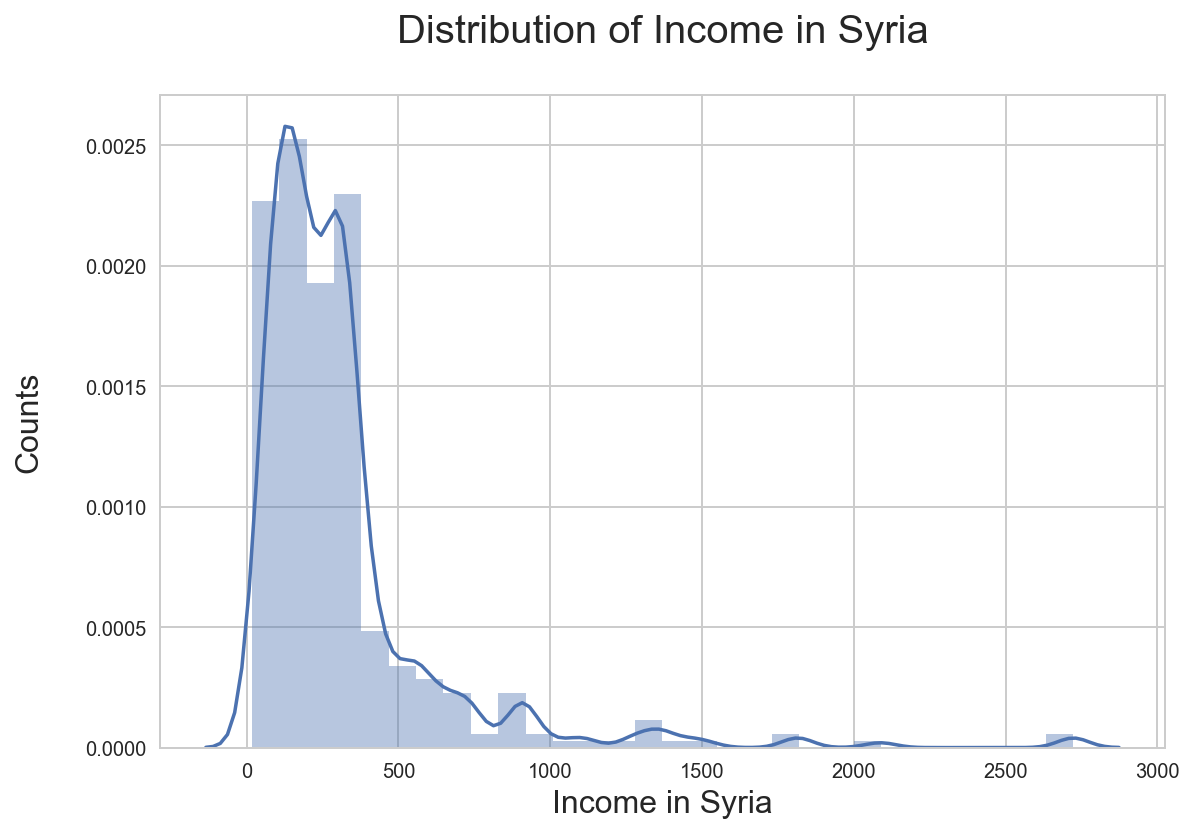

In [1503]:
mean_inc = np.mean(jordan.totalincomesyriadollars)

print 'Mean of Income in Syria : ', mean_inc

totalincomesyria = jordan.totalincomesyriadollars.values
fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(jordan.totalincomesyriadollars, bins=30, hist=True, kde=True,
                  ax=ax)

ax.set_ylabel('Counts\n', fontsize=16)
ax.set_title('Distribution of Income in Syria\n', fontsize=20)
ax.set_xlabel('Income in Syria', fontsize=16)

plt.show()

In [1504]:
### Most of the people of our sample have a little more than USD$300 of monthly income

In [1505]:
### Before going to the next stage of the analysis, we want to take a look for outliers, as we can there are several 
### outliers in those variables that will be used as matching covariates.
### However, we may want keep them in our sample, since these outliers may have a nearest neighborh to macth. 

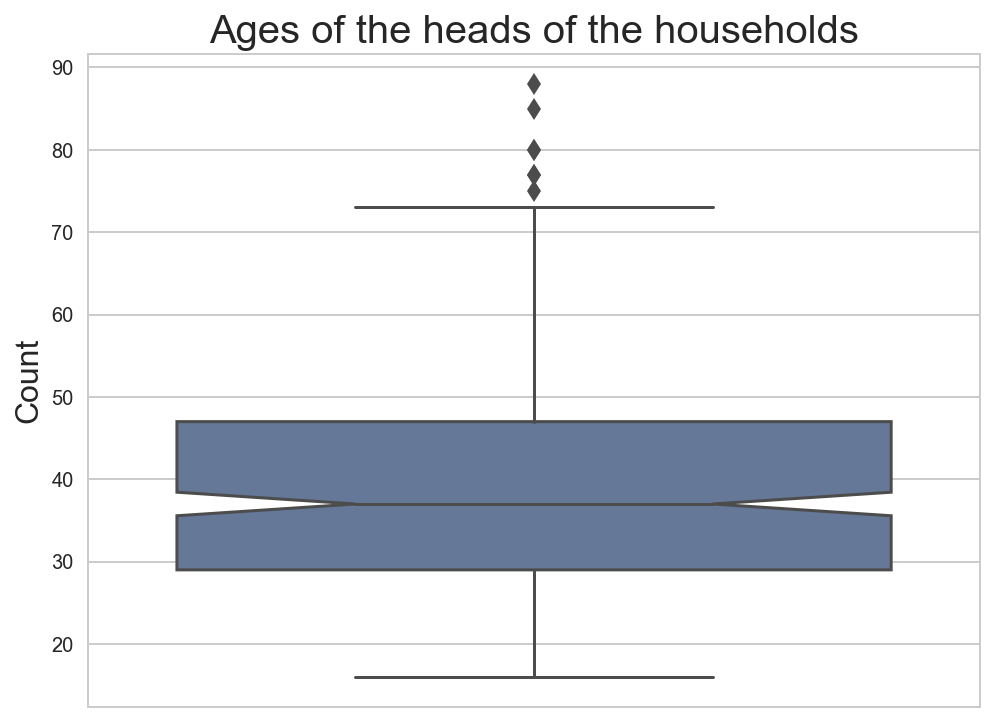

In [1506]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(jordan.age, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Count', fontsize=16)
ax.set_title('Ages of the heads of the households', fontsize=20)

plt.show()

In [1507]:
### Family Size

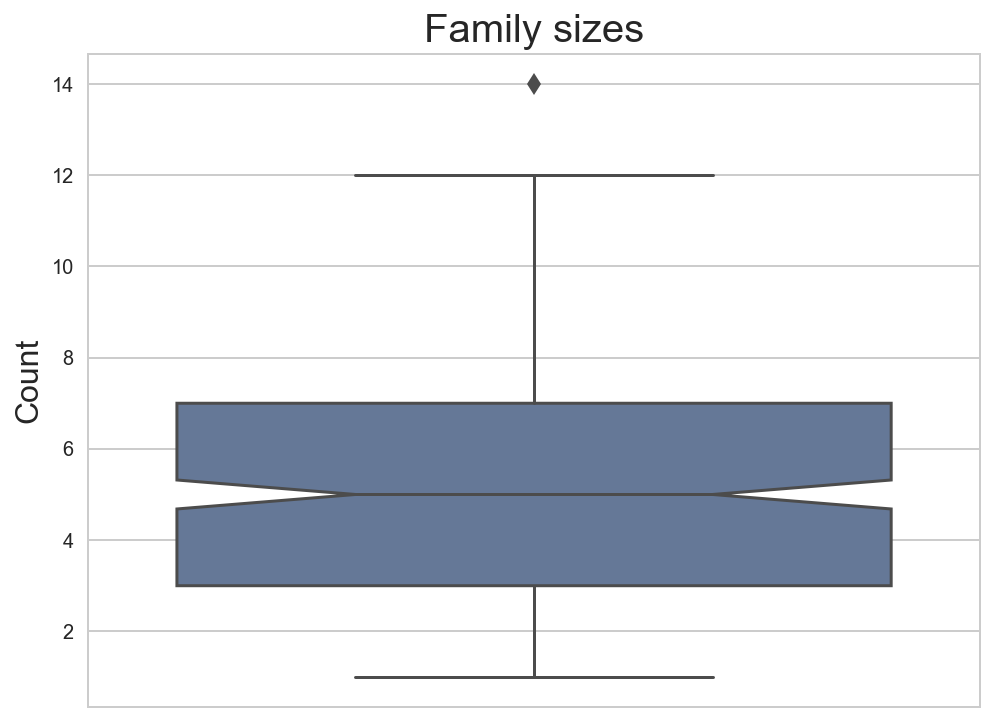

In [1508]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(jordan.familysize, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Count', fontsize=16)
ax.set_title('Family sizes', fontsize=20)

plt.show()

In [1509]:
### Income in Syria

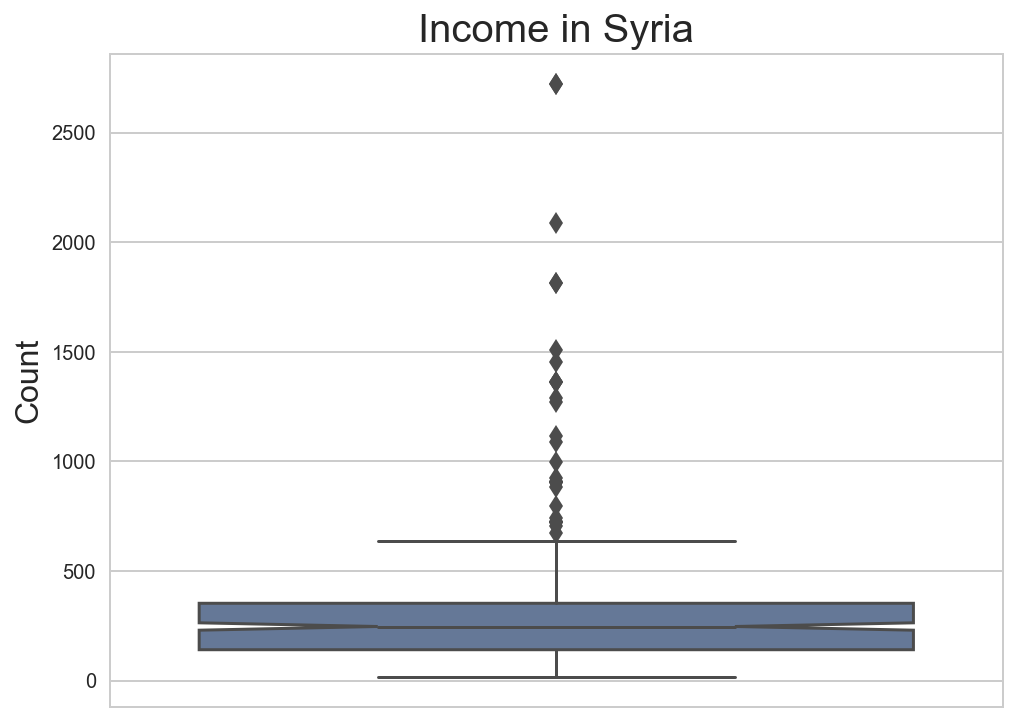

In [1510]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(jordan.totalincomesyriadollars, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Count', fontsize=16)
ax.set_title('Income in Syria', fontsize=20)

plt.show()

In [1511]:
### Now is of our interested to compared the distribution of our two subsample with the purpose of seeing how similar
### they are. Our two subsample consist in: control group and treatment group.
### Even though there is no reintegration policy for Syrian Refugees in Jordan, we assume that those that are living
### outside the treatment are under treatment (reintegration) and those living in Zaatari Camp are waitin for to be
### to be trated (control group). 
### The reality is that people living in the refugee camps have access to more treatments or assistance than those
### living in non-camo communities.

In [1512]:
### Our treatment variable is "treatment" and is a dummy with value of 1 for the treatment group and value of 0
### for the control group.

### We take a look at the treatment variable only

In [1513]:
print jordan.treatment

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
361    1.0
362    1.0
363    1.0
364    1.0
365    1.0
366    1.0
367    1.0
368    1.0
369    1.0
370    1.0
371    1.0
372    1.0
373    1.0
374    1.0
375    1.0
376    1.0
377    1.0
378    1.0
379    1.0
380    1.0
381    1.0
382    1.0
383    1.0
384    1.0
385    1.0
386    1.0
387    1.0
388    1.0
389    1.0
390    1.0
Name: treatment, dtype: float32


In [1514]:
### We need to convert floats to intergers
jordan.treatment = [int(float(x)) for x in jordan.treatment]

In [1515]:
print jordan.treatment

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
361    1
362    1
363    1
364    1
365    1
366    1
367    1
368    1
369    1
370    1
371    1
372    1
373    1
374    1
375    1
376    1
377    1
378    1
379    1
380    1
381    1
382    1
383    1
384    1
385    1
386    1
387    1
388    1
389    1
390    1
Name: treatment, dtype: int64


In [1516]:
### Now we proceed to analyze the distributions of our covariates between the two subsamples with the purpose 
### indentifying their similarities in terms of the previous socieconomic conditions

In [1517]:
### We start by defining a histogram function for the distribution of ages
def histogram_plotter(title, data1, data2):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data1), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data1))
    title = 'Distribution of ' + title + '; average age of the treated = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.axvline(np.mean(data2), lw=5, c='darkblue', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data2))
    title = title + '; average  age of the non-treated = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

Purple for Reintegrated
Green for Refugee Camp


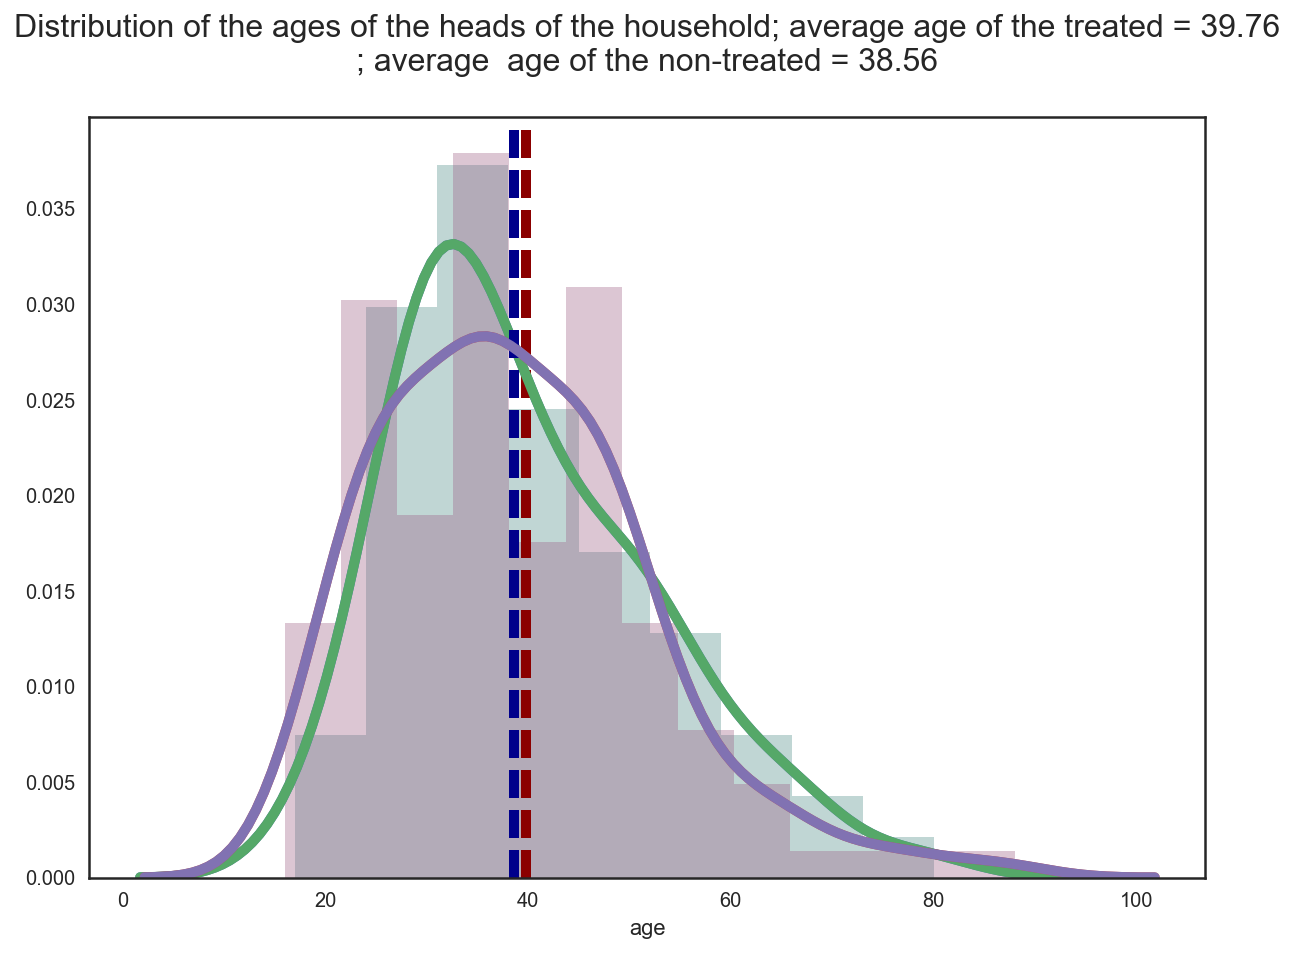

In [1518]:
histogram_plotter("the ages of the heads of the household", jordan.age[jordan.treatment == 1], jordan.age[jordan.treatment == 0])
print "Purple for Reintegrated"
print "Green for Refugee Camp"

In [1519]:
### We observe that on average the heads of households of both groups have very similar ages.

In [1520]:
### Now we look a the distrubion of gender between the two subsamples

In [1521]:
jordan.treatment=jordan.treatment.apply(lambda x:"Reintegrated" if x==1 else "Refugee Camp" if x==0 else x)

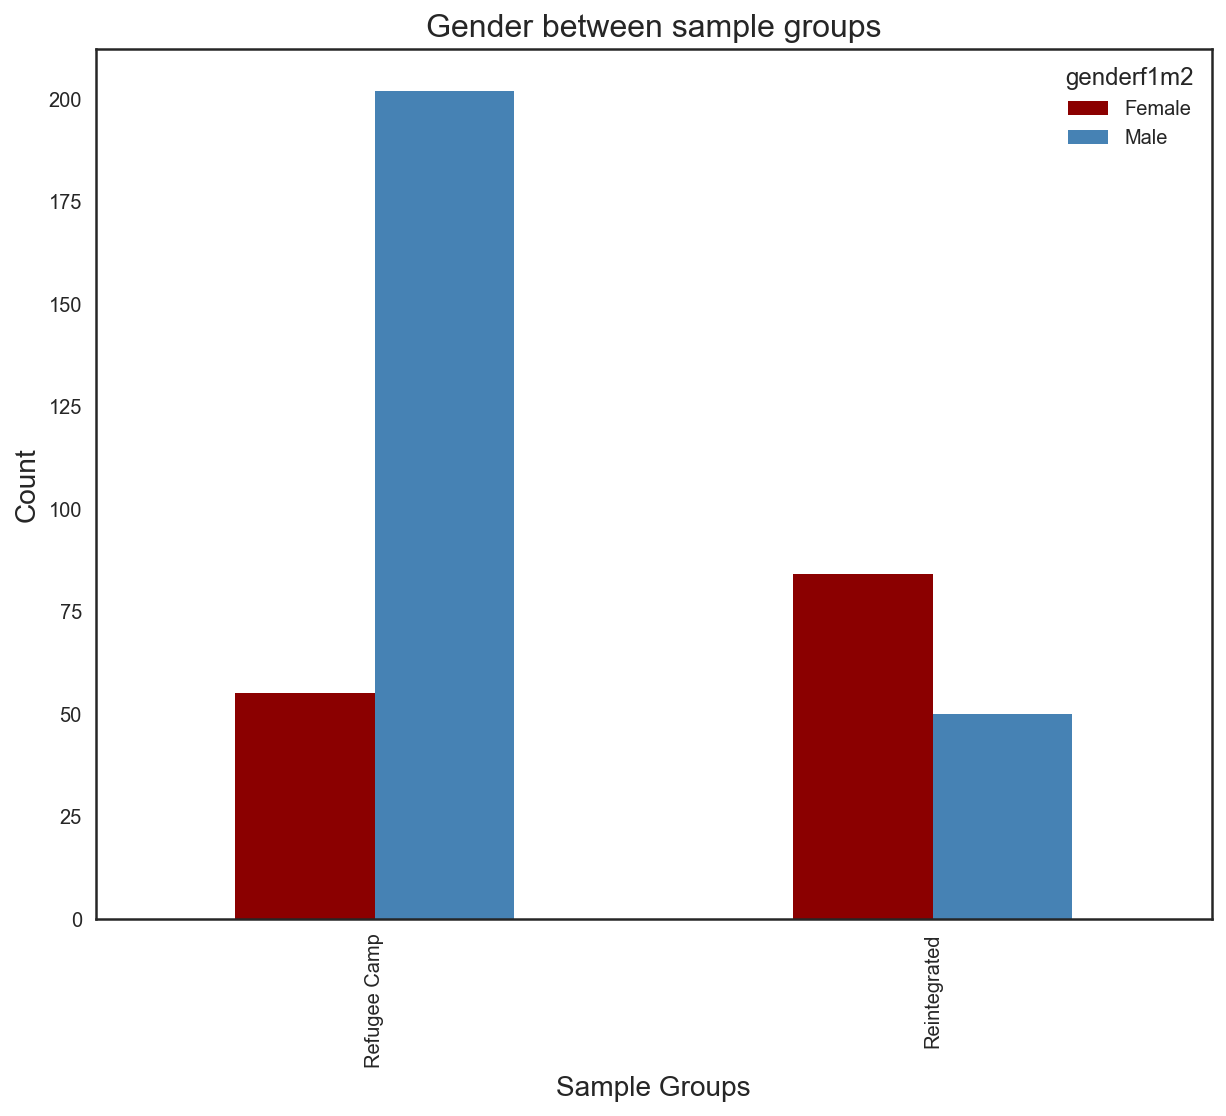

In [1522]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

jordan.groupby(['samplegroup','genderf1m2']).size().unstack().plot(kind="bar",                                                         colors=['darkred', 'steelblue'],
                                                        ax=ax)
plt.xlabel("Sample Groups", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title('Gender between sample groups', fontsize=16)
plt.show()

In [1523]:
### We observe that proportionaly more women were intervien in non-camp communities and more men were interviewed in 
### Zaatari Camp. 

In [1524]:
### Now we take a look a the distribuion of family size between subsamples

In [1525]:
def histogram_plotter(title, data1, data2):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data1), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data1))
    title = 'Distribution of ' + title + '; average family size of the treatment group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data2), lw=5, c='darkblue', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data2))
    title = title + '; average family size of the control group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

Green is for Reintegrated
Purple is for Refugee Camp


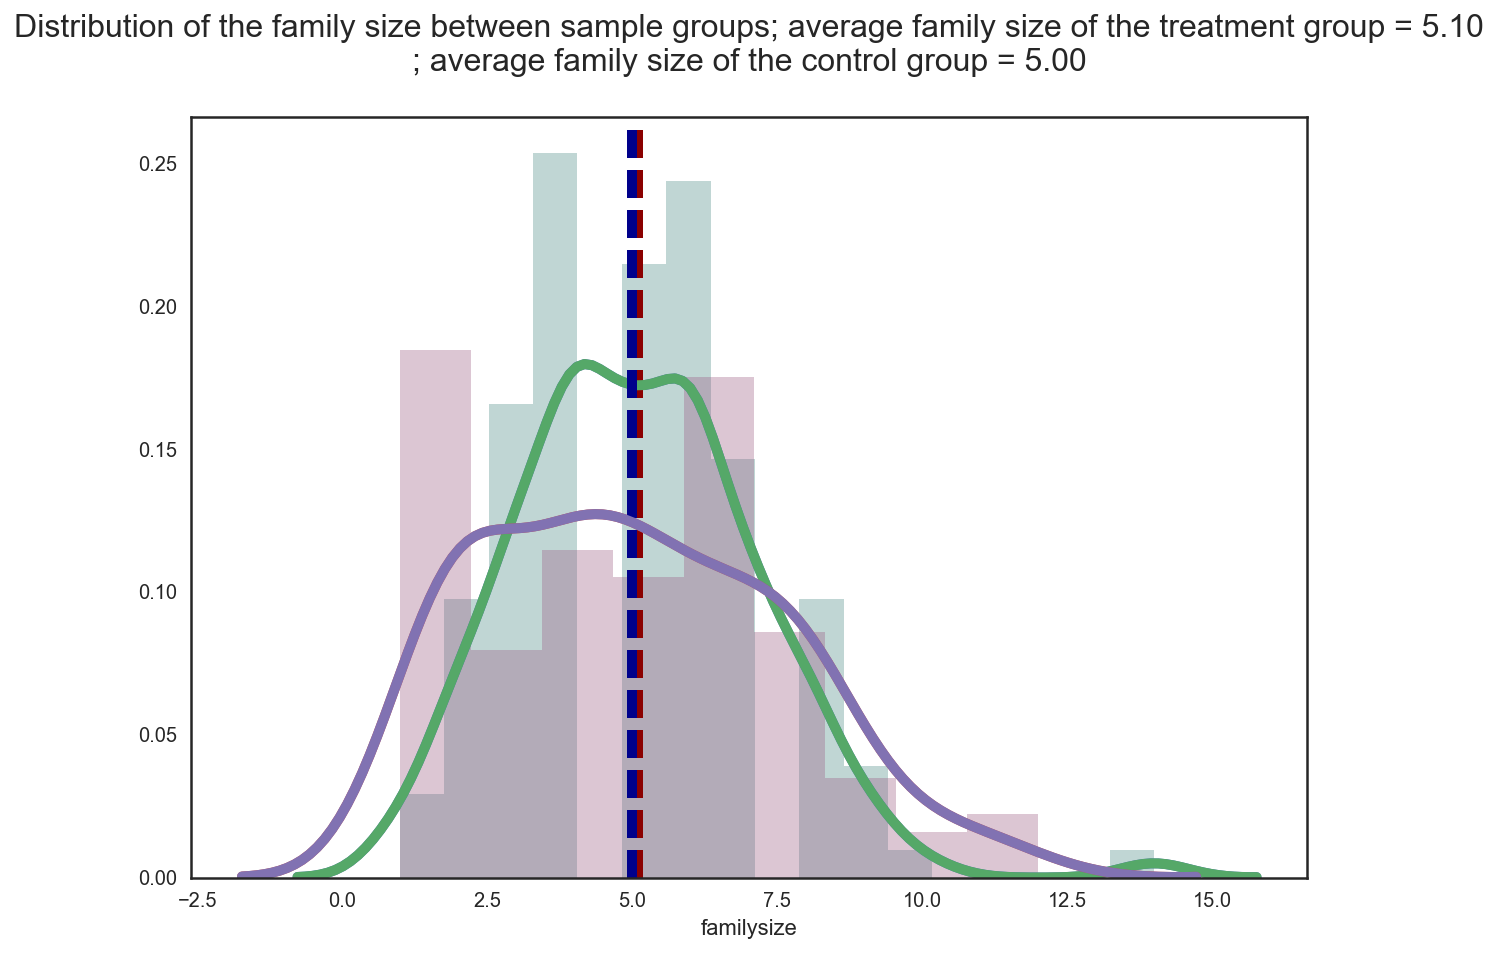

In [1526]:
histogram_plotter("the family size between sample groups", jordan.familysize[jordan.treatment == 'Reintegrated'], jordan.familysize[jordan.treatment == 'Refugee Camp'])
print "Green is for Reintegrated"
print "Purple is for Refugee Camp"

In [1527]:
### We observe that in average, family sizes are very similar between the two sample groups. 

In [1528]:
### Now we take a look at the distribution of levels of education between subsamples

In [1529]:
jordan.treatment=jordan.treatment.apply(lambda x:"Reintegrated" if x==1 else "Refugee Camp" if x==0 else x)

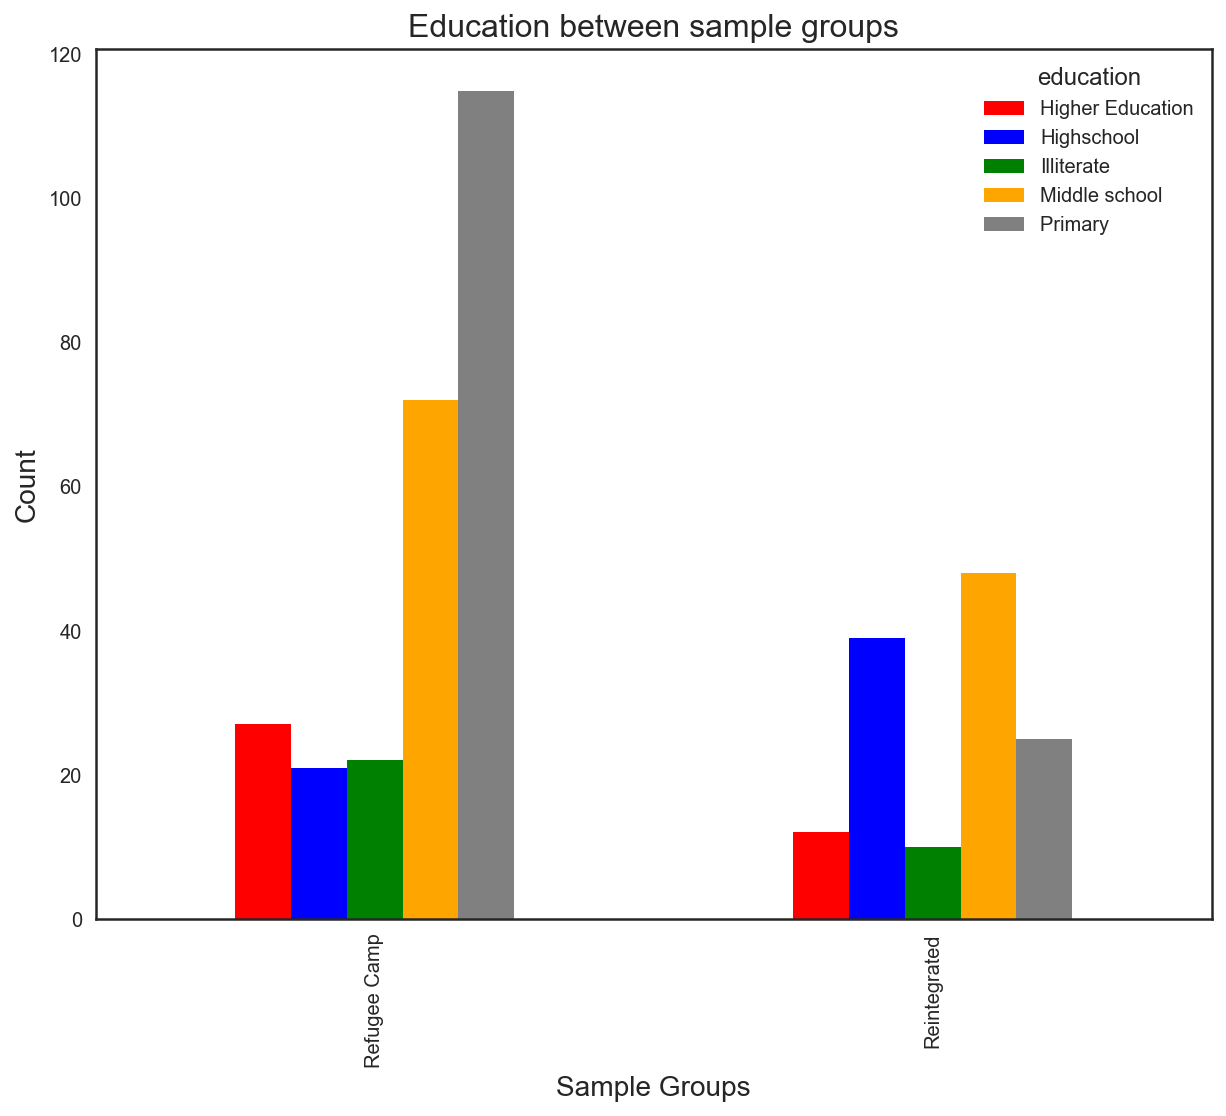

In [1530]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
jordan.groupby(['treatment','education']).size().unstack().plot(kind="bar", 
                                                        colors=['red', 'blue', 'green', 'orange', 'gray'], ax=ax)
plt.xlabel("Sample Groups", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title('Education between sample groups', fontsize=16)
plt.show()

In [1531]:
### We observe that people that are reintegrated in the non-camp communities tend to have higher levels of education
### compared to the people that is leaving in Zaatari Camp. 

In [1532]:
### Now we take a look at the presence of savings in the family between the two subsamples

In [1533]:
jordan.savingsdummy=jordan.savingsdummy.apply(lambda x:"Yes" if x==1 else "No" if x==0 else x)

In [1534]:
jordan.treatment=jordan.treatment.apply(lambda x:"Reintegrated" if x==1 else "Refugee Camp" if x==0 else x)

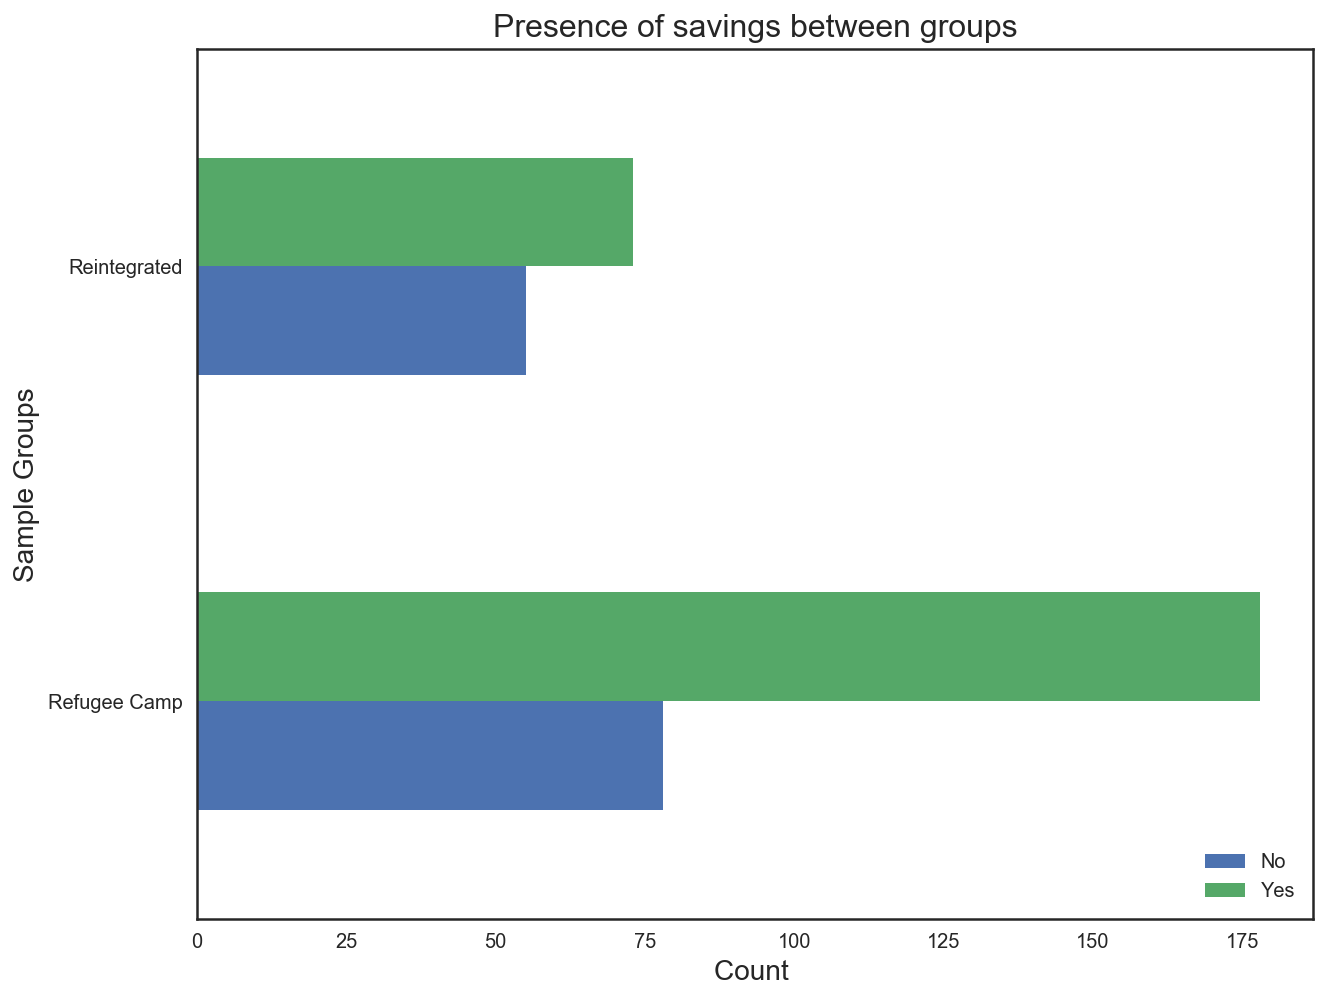

In [1535]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

jordan.groupby(['treatment','savingsdummy']).size().unstack().plot(kind="barh", ax=ax)

plt.xlabel("Count ", fontsize=14)
plt.ylabel("Sample Groups", fontsize=14)
plt.title('Presence of savings between groups', fontsize=16)
plt.legend(loc='lower right')
plt.show()

In [1536]:
### We observe that it was more common for families living in Zaatari Camp to use to have savings in Syria

In [1537]:
### Now we look at the places of origin 

In [1538]:
jordan.PlaceOfOrigin=jordan.PlaceOfOrigin.apply(lambda x:"Daraa" if x==1 else "North" if x==2 else "Central" if x==3 else "South" if x==4 else x)

In [1539]:
jordan.treatment=jordan.treatment.apply(lambda x:"Reintegrated" if x==1 else "Refugee Camp" if x==0 else x)

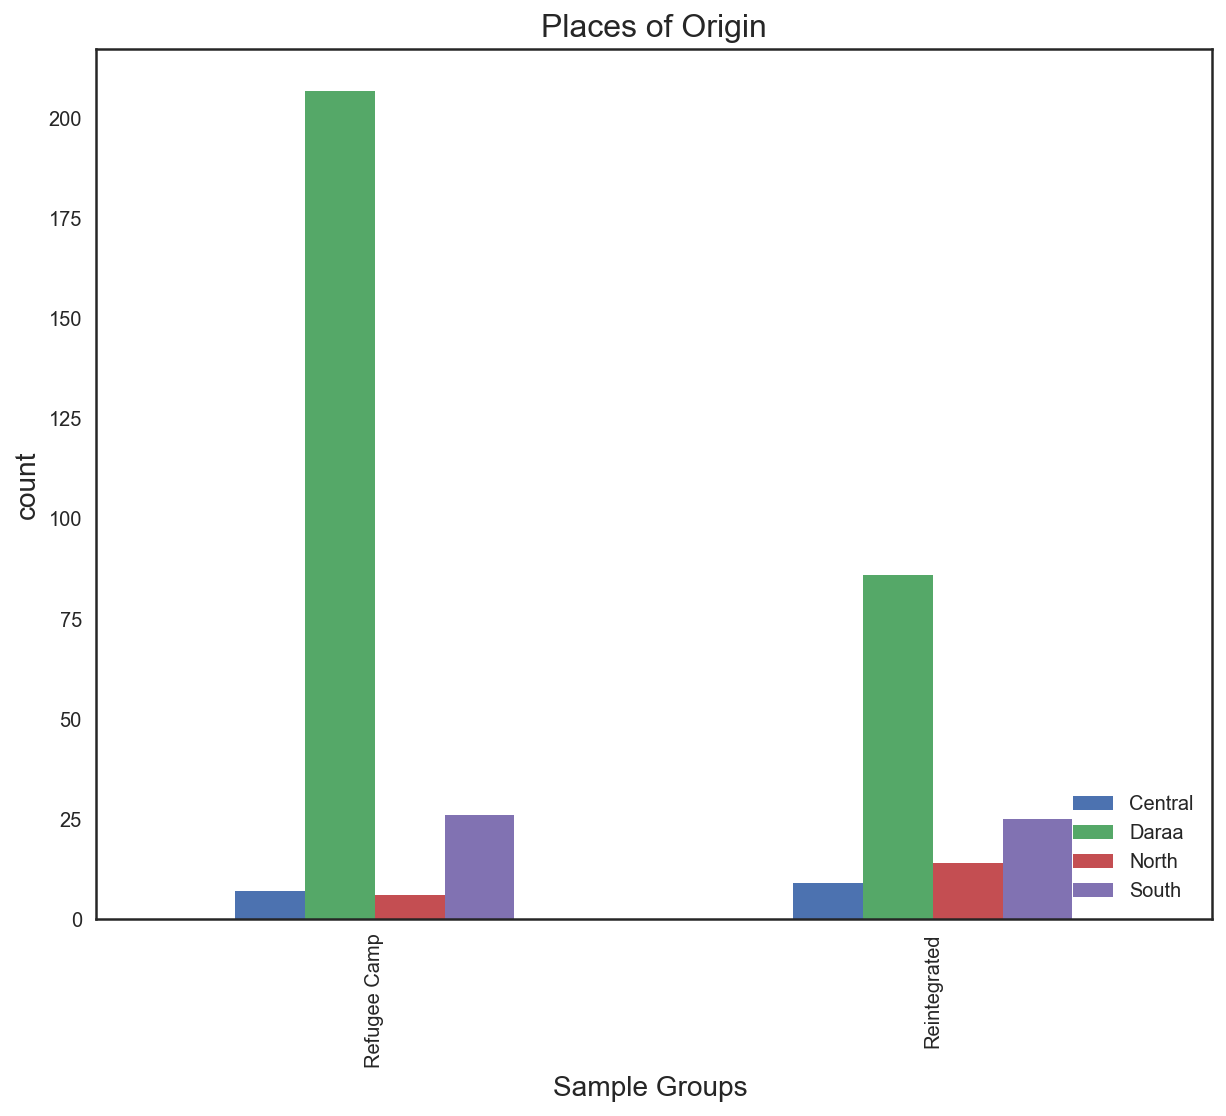

In [1540]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

jordan.groupby(['treatment','PlaceOfOrigin']).size().unstack().plot(kind="bar", ax=ax)

plt.xlabel("Sample Groups ", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.title('Places of Origin', fontsize=16)
plt.legend(loc='lower right')
plt.show()

In [1541]:
### We observe that most of the people in both subsamples come from Daraa

In [1542]:
#### We check at the values of the variable income, looking for missing values

In [1543]:
pd.isnull(jordan.totalincomesyriadollars)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
361    False
362    False
363    False
364    False
365    False
366    False
367    False
368    False
369    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
Name: totalincomesyriadollars, dtype: bool

In [1544]:
### We replace the variables with the mean
jordan.totalincomesyriadollars = jordan.totalincomesyriadollars.fillna(np.mean(jordan.totalincomesyriadollars))

In [1545]:
print jordan.totalincomesyriadollars[380:391]

380     741.300049
381     316.600983
382     145.199997
383     245.024994
384     907.500000
385     105.900002
386    1270.500000
387      42.360001
388      42.360001
389      84.720001
390     105.900002
Name: totalincomesyriadollars, dtype: float32


In [1546]:
### Now we take a look at the distribution of income between subsamples 

In [1547]:
def histogram_plotter(title, data1, data2):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data1), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data1))
    title = 'Distribution of ' + title + '; average income in the treatment group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data2), lw=5, c='darkblue', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data2))
    title = title + '; average income in the control group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

Green is for Reintegrated
Purple is for Refugee Camp


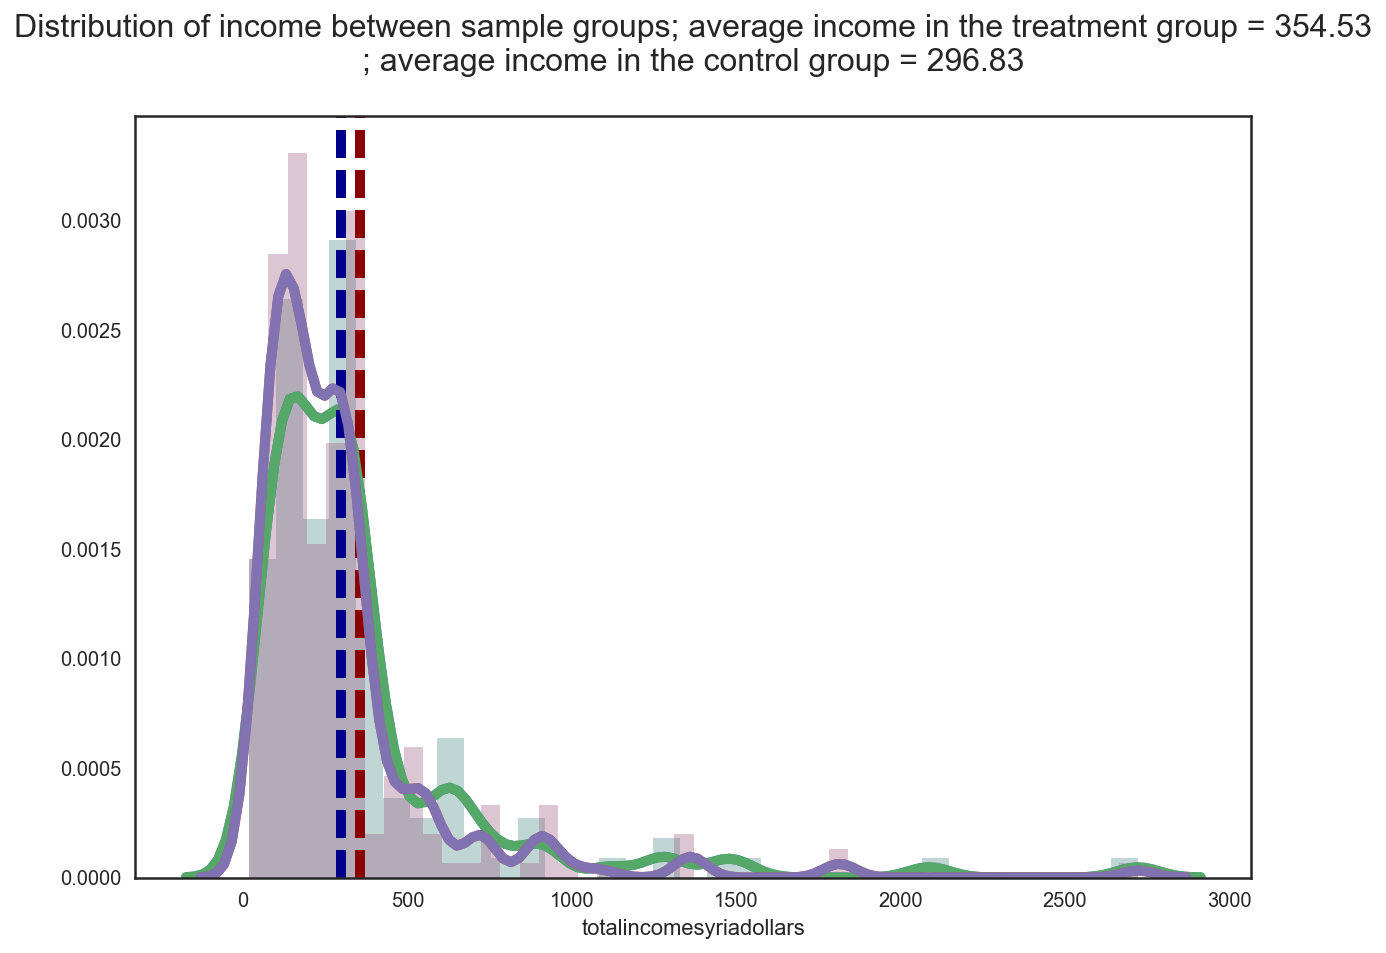

In [1548]:
histogram_plotter("income between sample groups", jordan.totalincomesyriadollars[jordan.treatment == 'Reintegrated'], jordan.totalincomesyriadollars[jordan.treatment == 'Refugee Camp'])
print "Green is for Reintegrated"
print "Purple is for Refugee Camp"

In [1549]:
### We observe that both subsamples have similar distribution of income. However, reintegrated house used to have 
##higher levels of income in Syria

In [1550]:
### Now we take a look a the distribution of amount of time living in Jordan

In [1551]:
### We check for missing values

In [1552]:
pd.isnull(jordan.tottime)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
361    False
362    False
363    False
364    False
365    False
366    False
367    False
368    False
369    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
Name: tottime, dtype: bool

In [1553]:
### replacing variables with the mean
jordan.tottime = jordan.tottime.fillna(np.mean(jordan.tottime))

In [1554]:
print jordan.tottime[380:391]

380    3.0
381    4.0
382    4.0
383    4.0
384    4.0
385    3.0
386    4.0
387    3.0
388    3.0
389    3.0
390    3.0
Name: tottime, dtype: float32


In [1555]:
def histogram_plotter(title, data1, data2):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data1), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data1))
    title = 'Distribution of ' + title + '; average amount of time living in Jordan in the treatment group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data2), lw=5, c='darkblue', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data2))
    title = title + '; average amount of time living in Jordan in the control group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

Green for Reintegrated
Purple for Refugee Camp


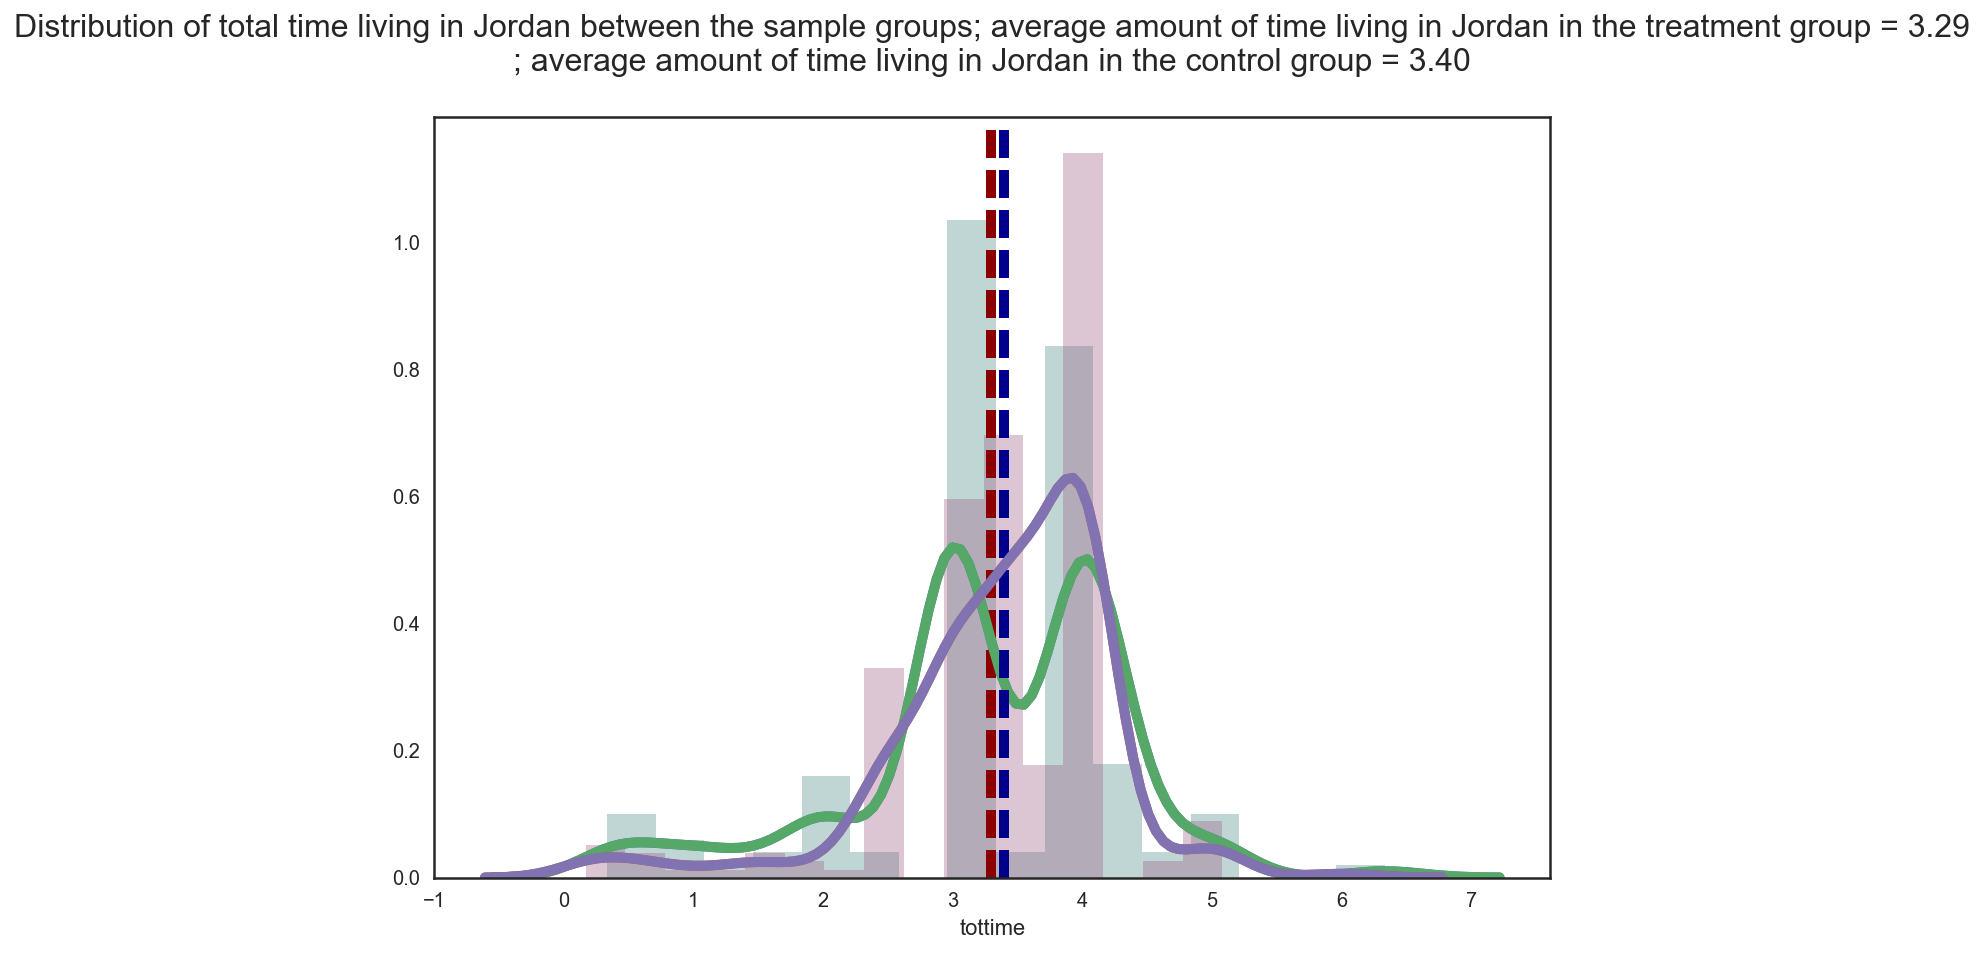

In [1556]:
histogram_plotter("total time living in Jordan between the sample groups", jordan.tottime[jordan.treatment == 'Reintegrated'], jordan.tottime[jordan.treatment == 'Refugee Camp'])
print "Green for Reintegrated"
print "Purple for Refugee Camp"

In [1557]:
### We observe that on average families living in Zaatari Camp have been livin there, just for a little longer than
### than families living in non-camp communities

In [1558]:
### Now that we had describe our covariates, we are interested to what is the actual impact of reintegration
### on variables such as: Income in Jordan, Expenses in Jordan, Optimism, Reduction in Consumption and 
###Personal Integration

In [1559]:
### We will limit our analysis to a description of these variables between the two sumsamples and multiple regressions
### of the variables of interest with the covariates

In [1560]:
### We start this section with Income in Jordan between two subgroups

In [1561]:
pd.isnull(jordan.totalincomejordandollars)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
361    False
362    False
363    False
364    False
365    False
366    False
367    False
368    False
369    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
Name: totalincomejordandollars, dtype: bool

In [1562]:
### replacing variables with the mean
jordan.totalincomejordandollars = jordan.totalincomejordandollars.fillna(np.mean(jordan.totalincomejordandollars))

In [1563]:
def histogram_plotter(title, data1, data2):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data1), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data1))
    title = 'Distribution of ' + title + '; average income in Jordan in the treatment group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data2), lw=5, c='darkblue', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data2))
    title = title + '; average income in Jordan in the control group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

Green is for reintegrated
Purple is for Refugee Camp


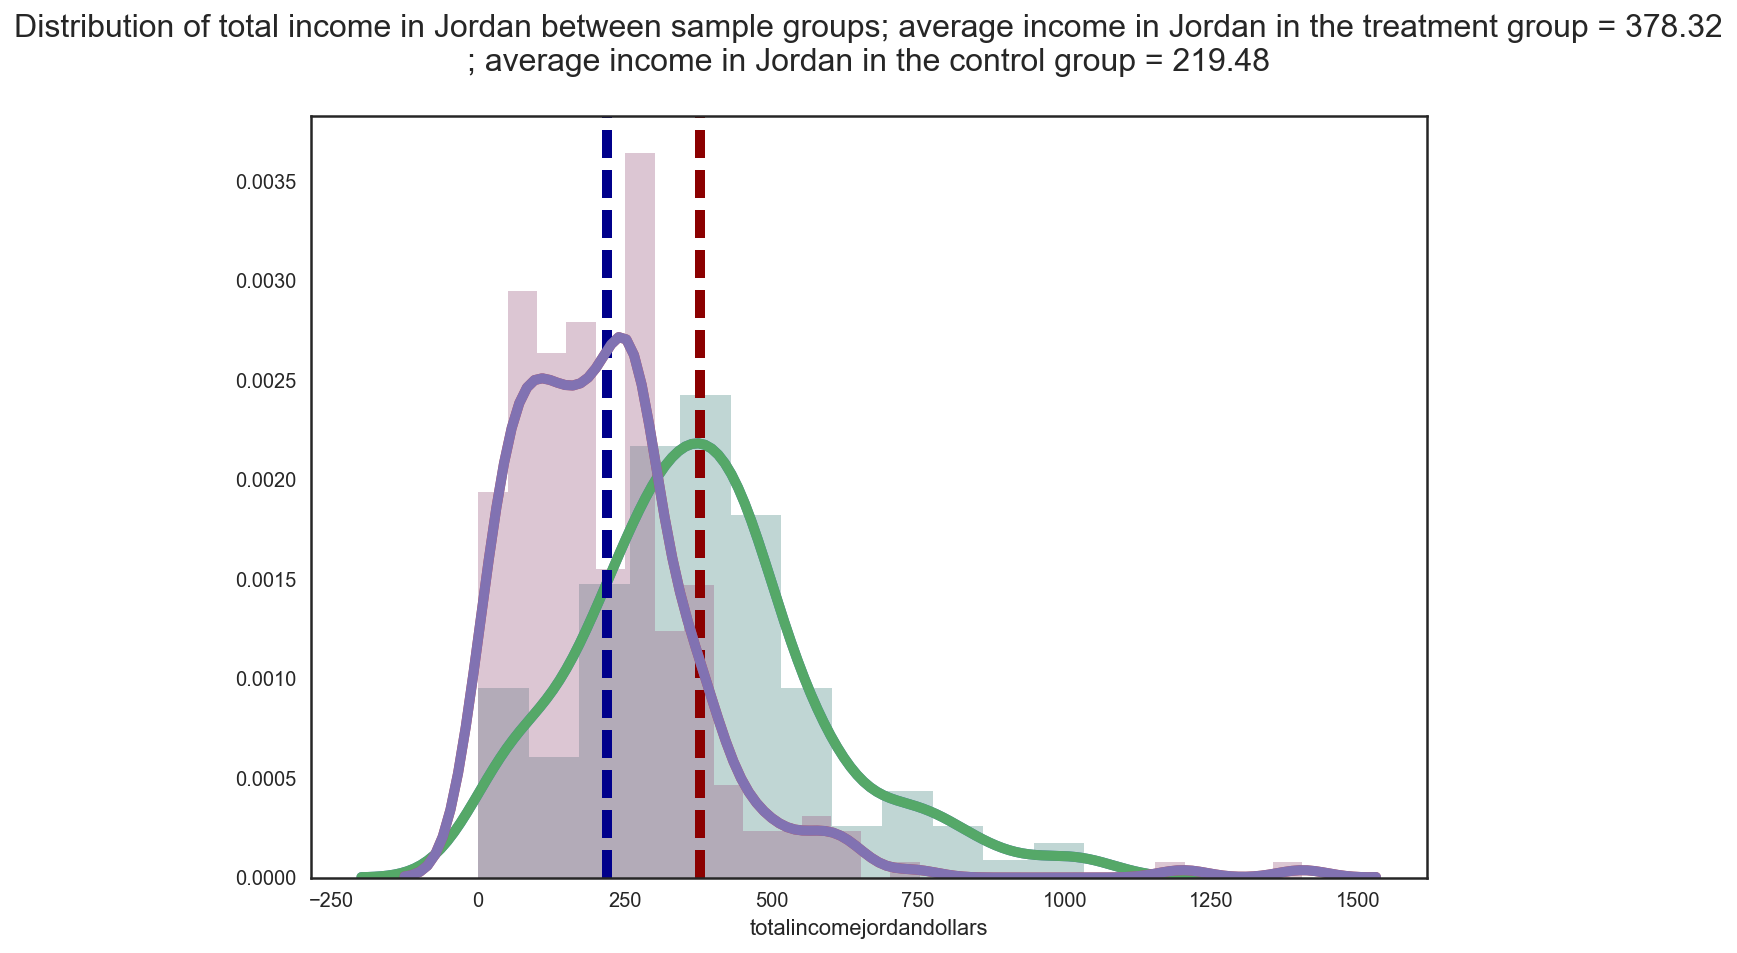

In [1564]:
histogram_plotter("total income in Jordan between sample groups", jordan.totalincomejordandollars[jordan.treatment == 'Reintegrated'], jordan.totalincomejordandollars[jordan.treatment == 'Refugee Camp'])
print "Green is for reintegrated"
print "Purple is for Refugee Camp"

In [1565]:
### We observe that on average thos families that are reintegrated have higher levels of income 

In [1566]:
### Now we take a look at the leves of expenses in jordan

In [1567]:
pd.isnull(jordan.totalexpensesjordandollars)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
361    False
362    False
363    False
364    False
365    False
366    False
367    False
368    False
369    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
Name: totalexpensesjordandollars, dtype: bool

In [1568]:
### replacing variables with the mean
jordan.totalexpensesjordandollars = jordan.totalexpensesjordandollars.fillna(np.mean(jordan.totalexpensesjordandollars))

In [1569]:
def histogram_plotter(title, data1, data2):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data1), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data1))
    title = 'Distribution of ' + title + '; expenses in Jordan in the treatment group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data2), lw=5, c='darkblue', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data2))
    title = title + '; expenses in Jordan in the control group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

Green for Reintegrated
Purple for Refugee Camp


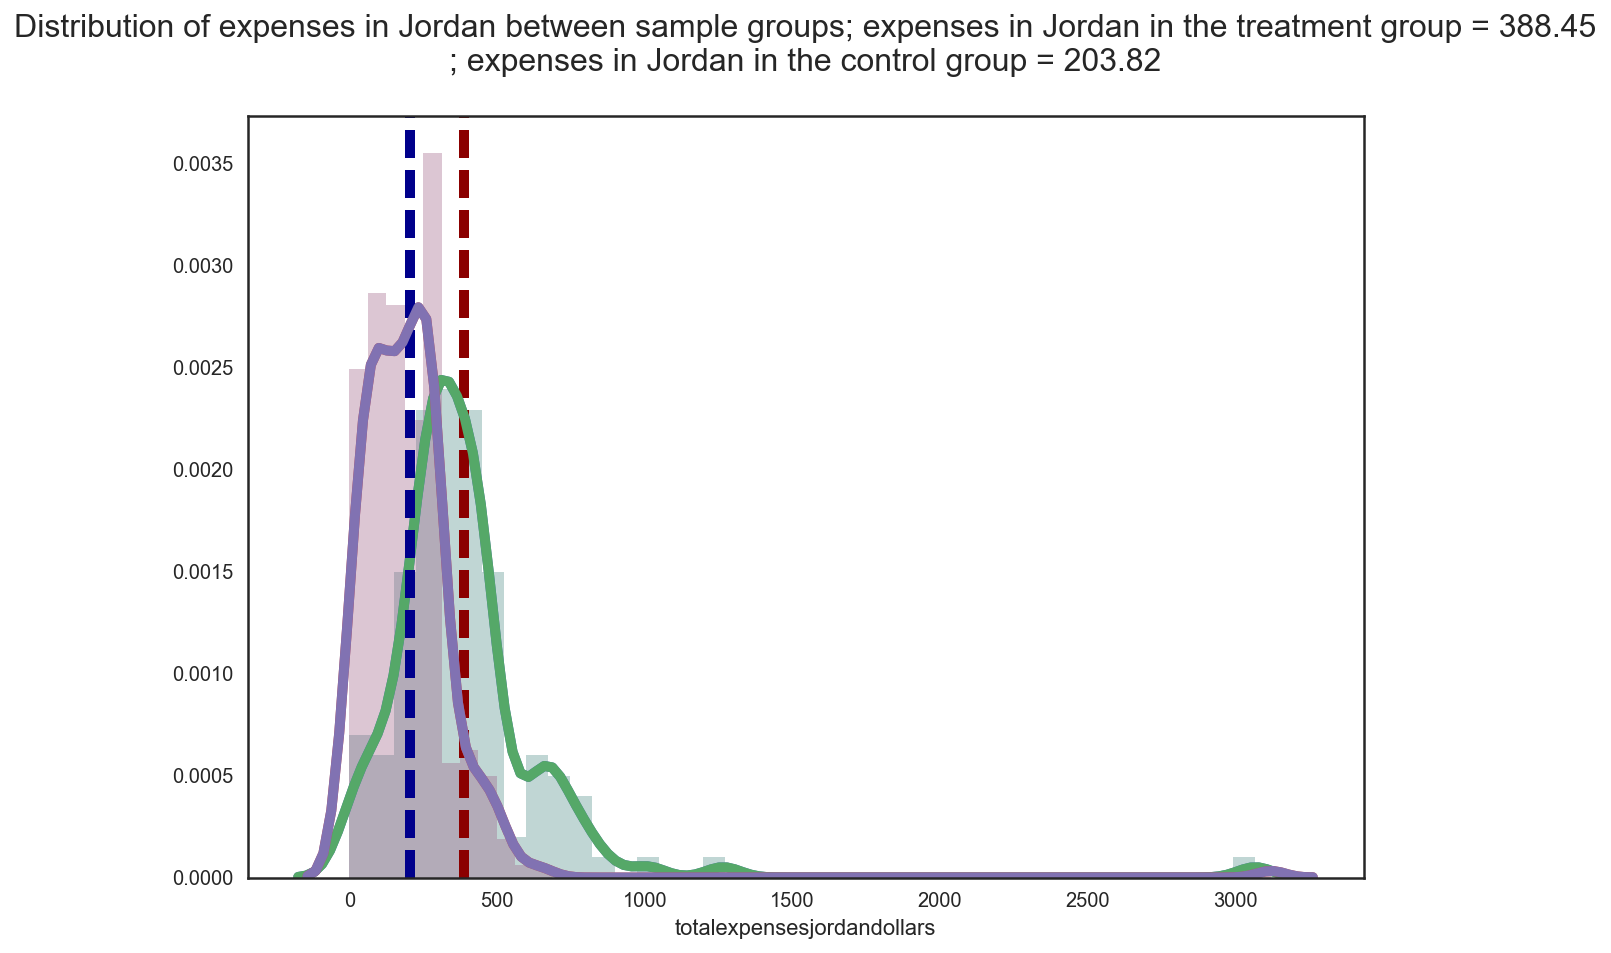

In [1570]:
histogram_plotter("expenses in Jordan between sample groups", jordan.totalexpensesjordandollars[jordan.treatment == 'Reintegrated'], jordan.totalexpensesjordandollars[jordan.treatment == 'Refugee Camp'])
print "Green for Reintegrated"
print "Purple for Refugee Camp"

In [1571]:
### We also observe that the levels of expenses are on average higher for reintegrated families compared to those
### those families living in Zaatari Camp

In [1572]:
### Now we take a look at the levels of optimism 

In [1573]:
pd.isnull(jordan.optimism)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
361    False
362    False
363    False
364    False
365    False
366    False
367    False
368    False
369    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379     True
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
Name: optimism, dtype: bool

In [1574]:
### replacing variables with the mean
jordan.optimism = jordan.optimism.fillna(np.mean(jordan.optimism))

In [1588]:
def histogram_plotter(title, data1, data2):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data1), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data1))
    title = 'Distribution of ' + title + '; average optimism in the treatment group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data2), lw=5, c='darkblue', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data2))
    title = title + '; average optimism in the control group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

Green is for Reintegrated
Purple is for Refugee Camp


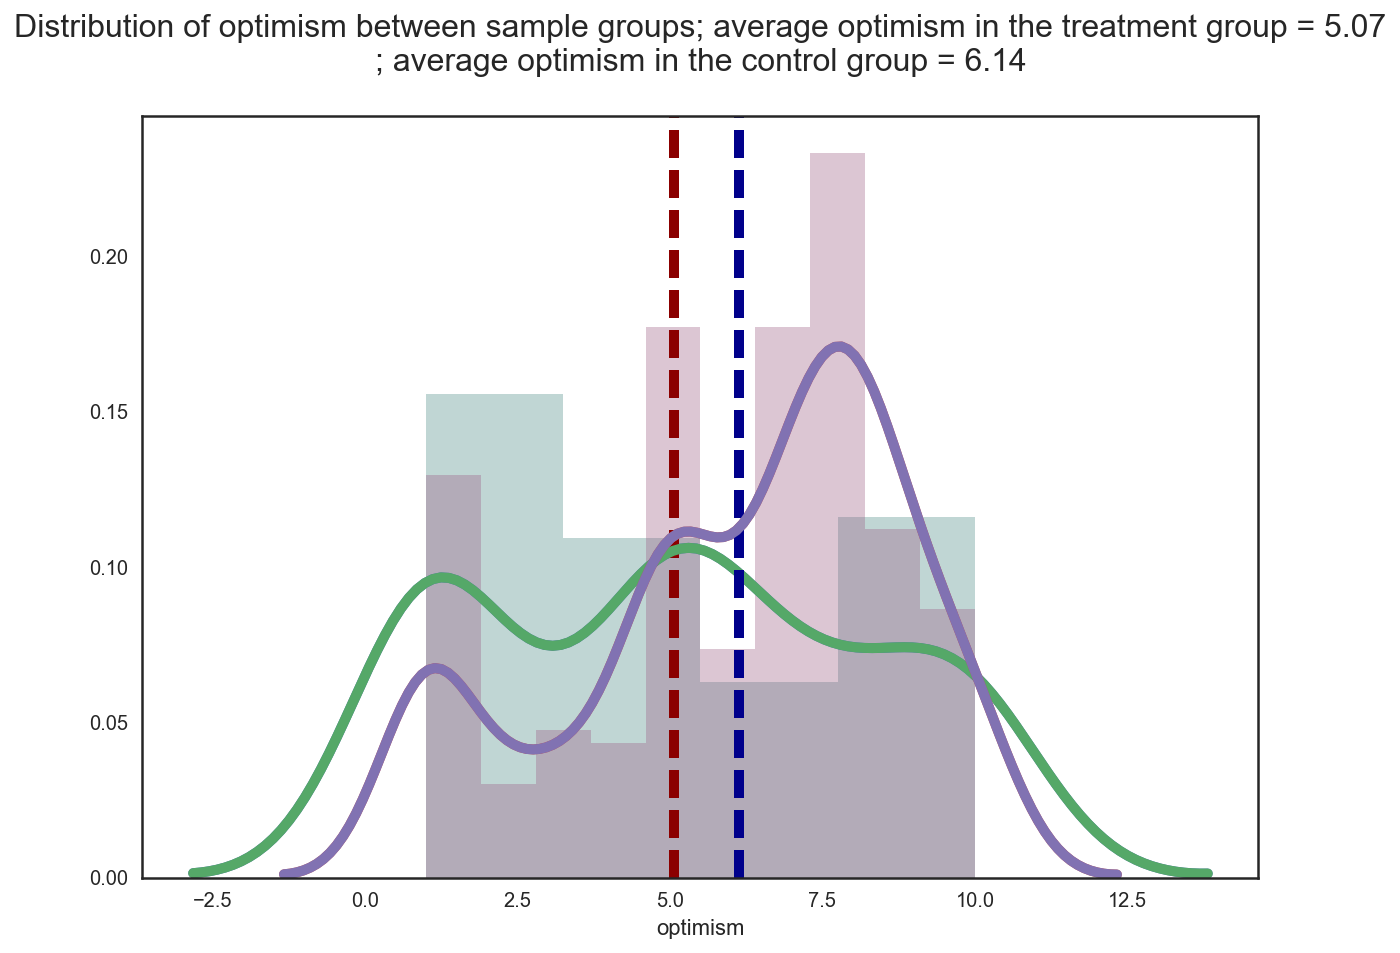

In [1589]:
histogram_plotter("optimism between sample groups", jordan.optimism[jordan.treatment == 'Reintegrated'], jordan.optimism[jordan.treatment == 'Refugee Camp'])
print "Green is for Reintegrated"
print "Purple is for Refugee Camp"

In [1590]:
### We observe that on average levels of optimism are a little higher for those families that are living in Zaatari Camp 
### Compared to thos families living in non-camp communities

In [1591]:
### Now we take a look a the presence of negative coping behaviors such as, reduction of household consuption

In [1592]:
pd.isnull(jordan.redhhcondummy)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
361    False
362    False
363    False
364    False
365    False
366    False
367    False
368    False
369    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
Name: redhhcondummy, dtype: bool

In [1593]:
### replacing variables with the mean
jordan.redhhcondummy = jordan.redhhcondummy.fillna(np.mean(jordan.redhhcondummy))

In [1594]:
def histogram_plotter(title, data1, data2):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data1), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data1))
    title = 'Distribution of ' + title + '; reduction in consumption in the treatment group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data1, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data2), lw=5, c='darkblue', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data2))
    title = title + '; reduction in consumption in the control group = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data2, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

Green is for Reintegrated
Purple is for Refugee Camp


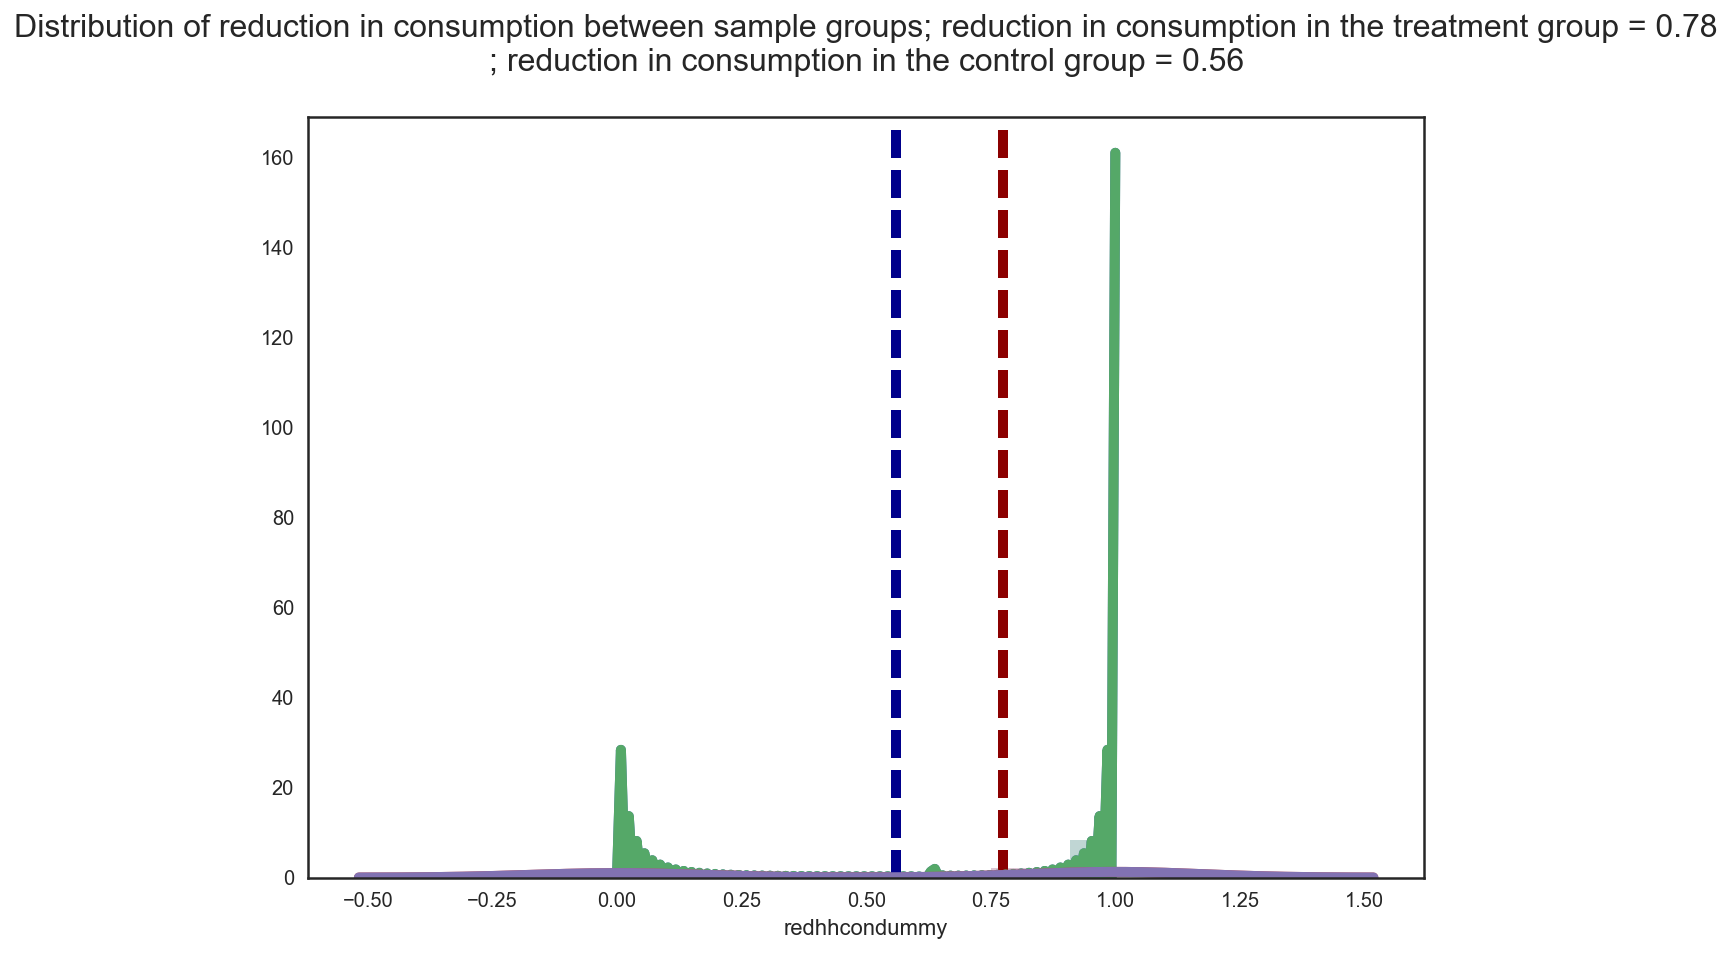

In [1595]:
histogram_plotter("reduction in consumption between sample groups", jordan.redhhcondummy[jordan.treatment == 'Reintegrated'], jordan.redhhcondummy[jordan.treatment == 'Refugee Camp'])
print "Green is for Reintegrated"
print "Purple is for Refugee Camp"

In [1596]:
### We observe than on average those families livin in non-camp communities tend to reduce more their levels of 
### consumption compared to families living in Zaatari Camp. 
### This migh be a result of the greater access to assitance for the families that live in Zaatari Camp 

In [1597]:
### In this point it is not really clear what kind of environment offers more development opportunities for Syrian 
### Refugee families. In one hand families living in non-camp communities seem to have better labor opportunities. 
### But in the other hand families living in Zaataria Camp seem to have access to different kind of assistance, 
### not only in economic terms but also in term of their psychological development. 

In [1598]:
### We use a correlation chart to see if this may highlight an strong relationship between our variables

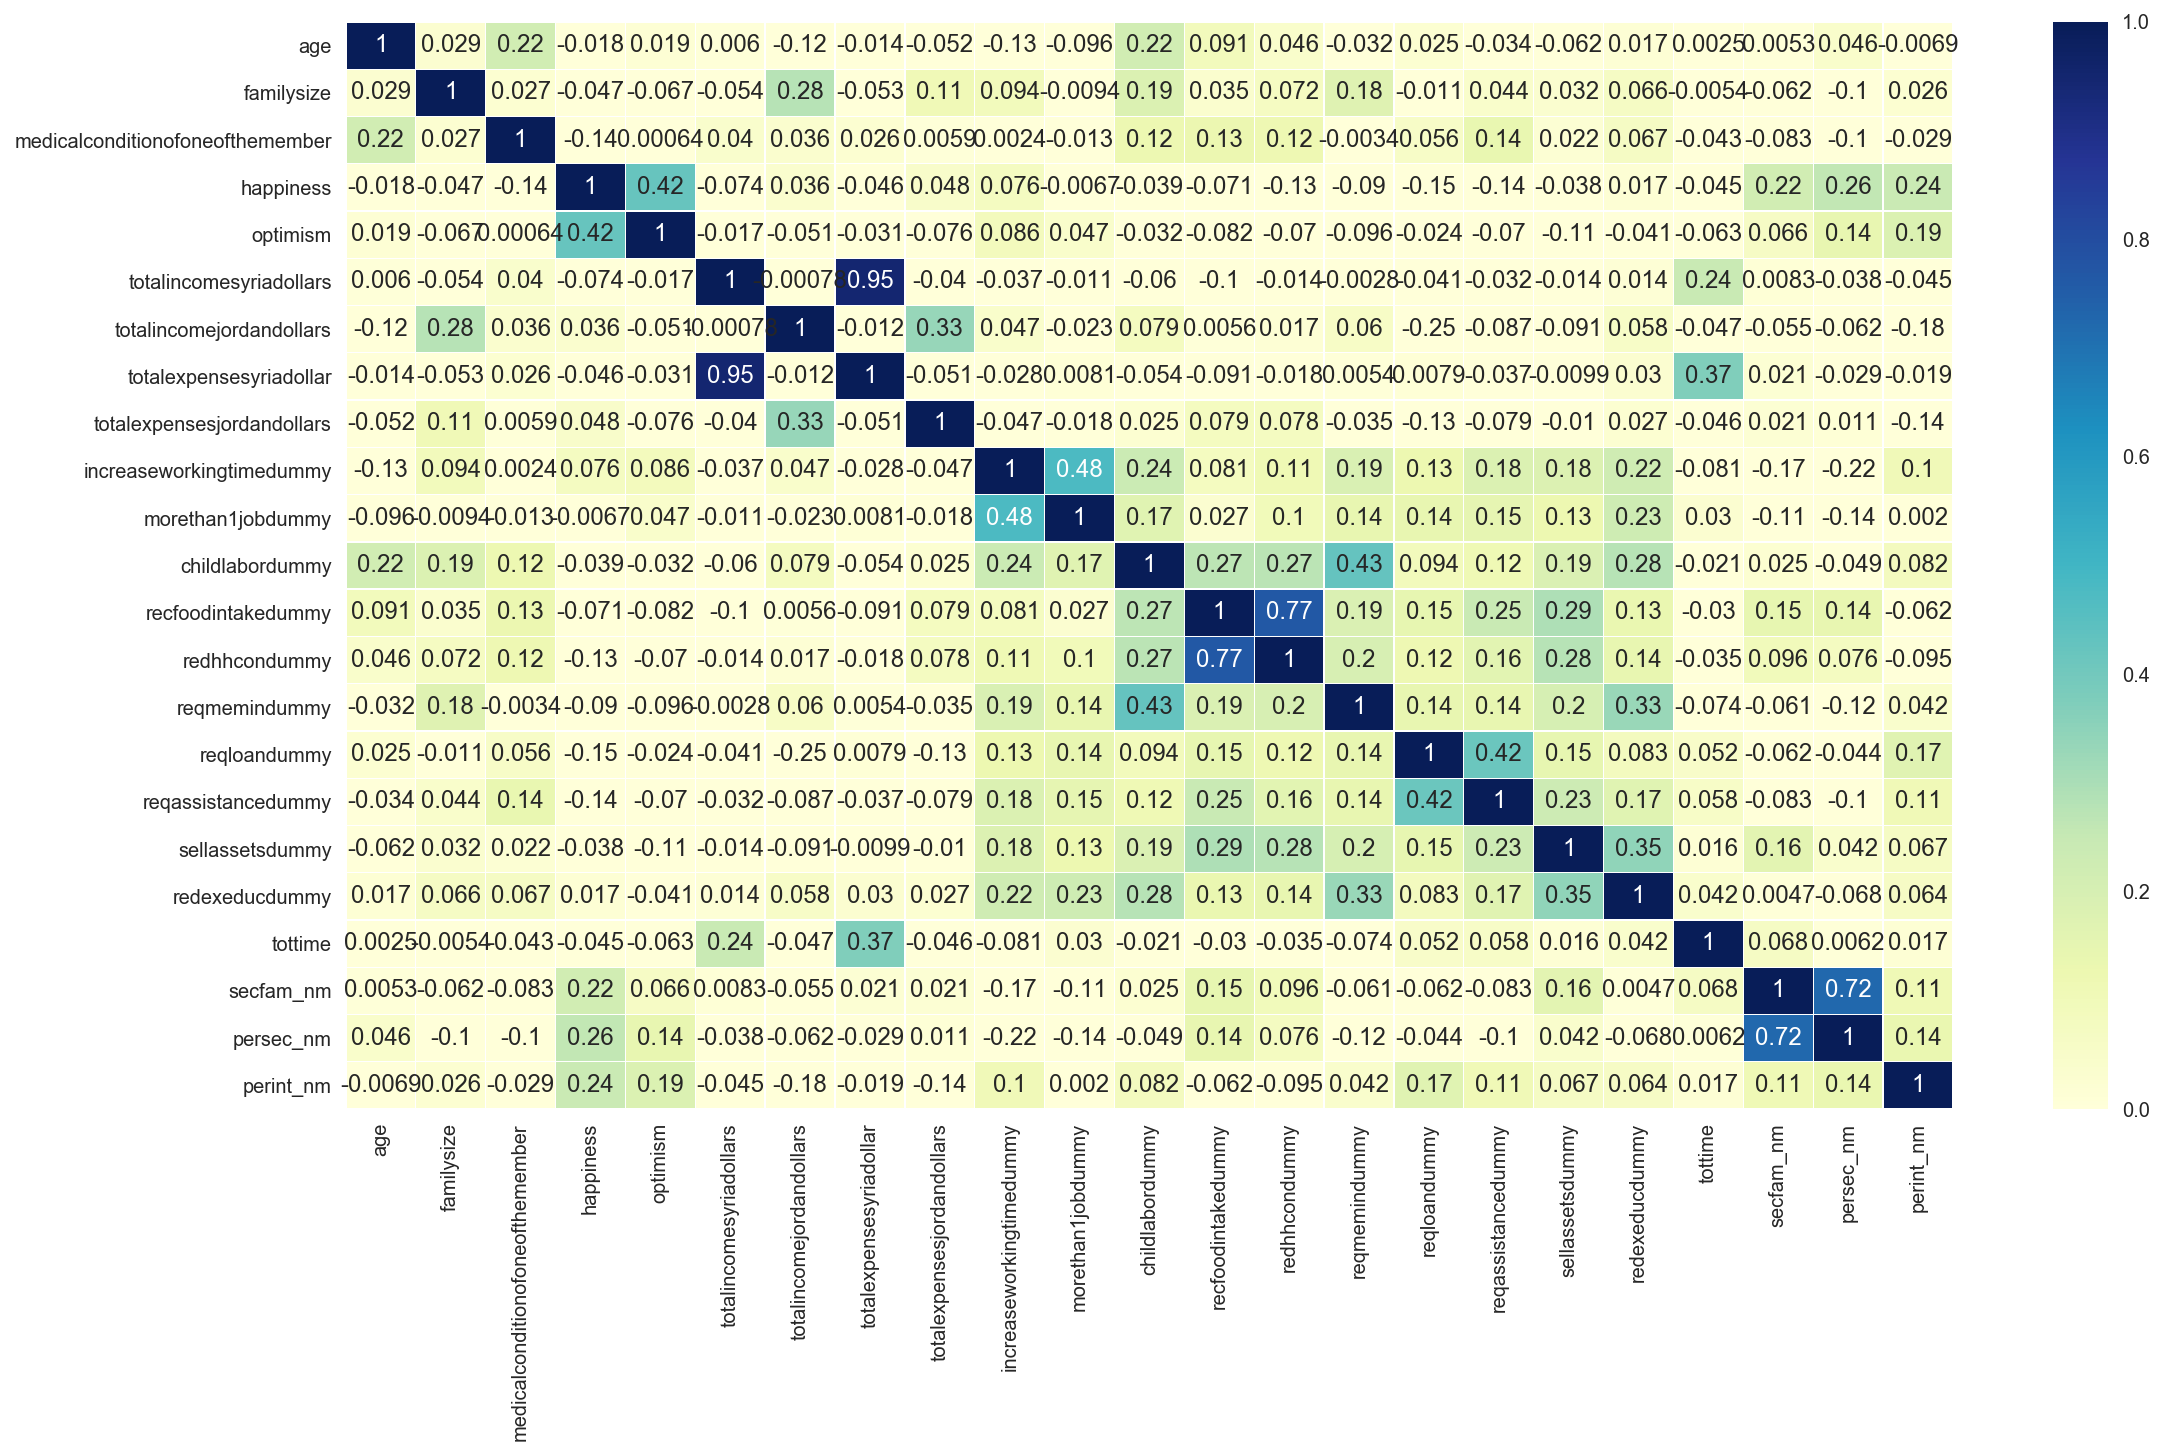

In [1599]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(jordan.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [1600]:
### We observe that there is no strong relationship to find between our variables, except thos that are obvious
### like the levels of expenses and income for each country. Furthermore, the variable as itself do not have any 
### strong relationship with any variable, which implies that treatment by itself do not have an strong effect on any
### other variable. 

### We will continue our analysis with linear regression trying to indentify any possible effect of treatmen with it's 
### interaction with other variables, on our variables of interest: income, expenses, optimism and reduction 
### of consumption)

In [1601]:
import statsmodels.formula.api as smf
lm_stats_1 = smf.ols(formula='totalincomejordandollars ~  treatment + age + education + PlaceOfOrigin + familysize + tottime', data=jordan).fit()
print (lm_stats_1.summary())

                               OLS Regression Results                               
Dep. Variable:     totalincomejordandollars   R-squared:                       0.271
Model:                                  OLS   Adj. R-squared:                  0.249
Method:                       Least Squares   F-statistic:                     12.43
Date:                      Mon, 27 Feb 2017   Prob (F-statistic):           5.30e-20
Time:                              17:36:46   Log-Likelihood:                -2486.0
No. Observations:                       380   AIC:                             4996.
Df Residuals:                           368   BIC:                             5043.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------

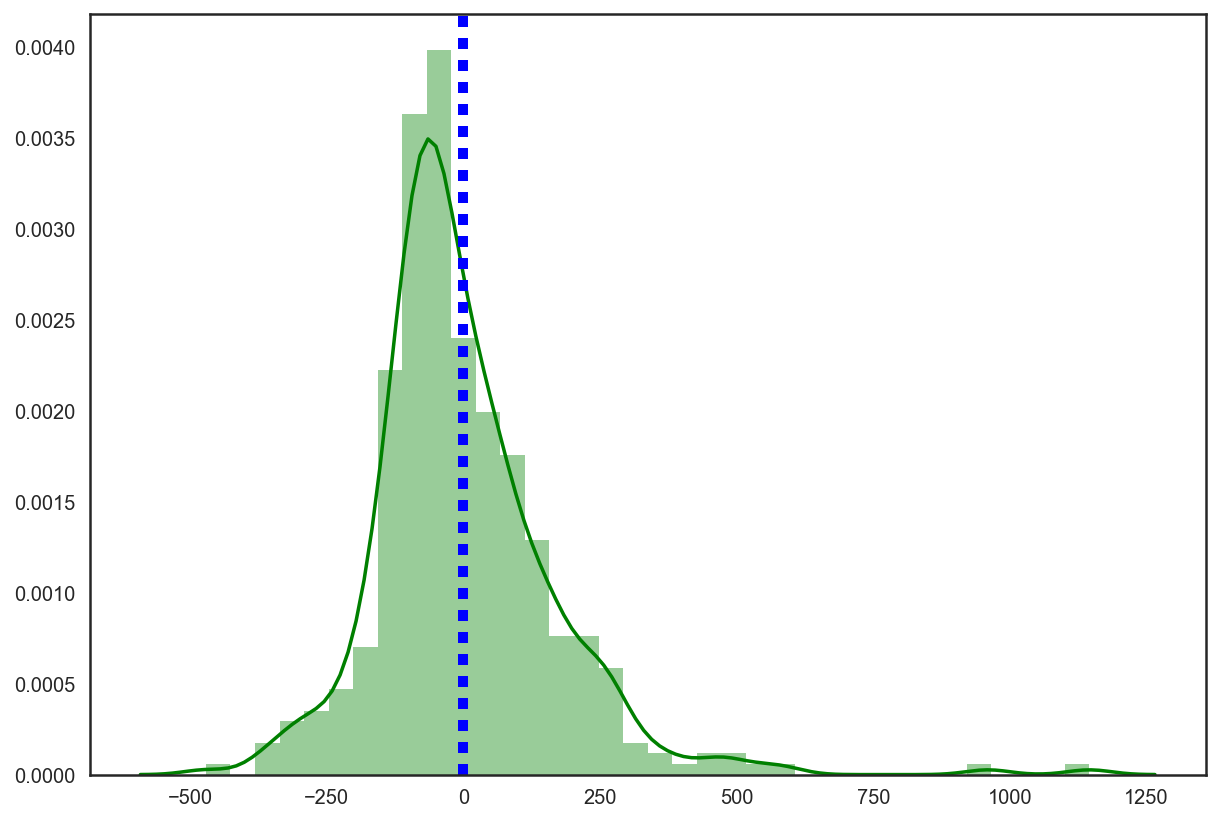

In [1602]:
np.mean(lm_stats_1.resid)
sns.distplot(lm_stats_1.resid, color='g')
plt.axvline(np.mean(lm_stats_1.resid), color='b', linestyle='dotted', linewidth=5)
plt.show()

In [1603]:
### We observer a very low R-squared which implies that current model do not have high explanatory power. 
### However we are able to indentify some interesting findins.
### Reintegration does have a positive impact on the levels of income in Jordan.
### Both Elementary and Illiterate have a negative impact of the levels of income in Jordan
### Age has a negative effect 
### And Family size seems to have a positive effect

In [1604]:
### Now we take a look at the levels of optimism
### We exclude from this analysis income in syria for it's possible correlation with levels of education.
### And we exclude expenses in jordan for it's strong correlation with income in Jordan.

In [1605]:
lm_stats_1 = smf.ols(formula='optimism ~  treatment + age + education + PlaceOfOrigin + familysize + tottime', data=jordan).fit()
print (lm_stats_1.summary())

                            OLS Regression Results                            
Dep. Variable:               optimism   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.659
Date:                Mon, 27 Feb 2017   Prob (F-statistic):             0.0809
Time:                        17:36:48   Log-Likelihood:                -933.80
No. Observations:                 380   AIC:                             1892.
Df Residuals:                     368   BIC:                             1939.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept           

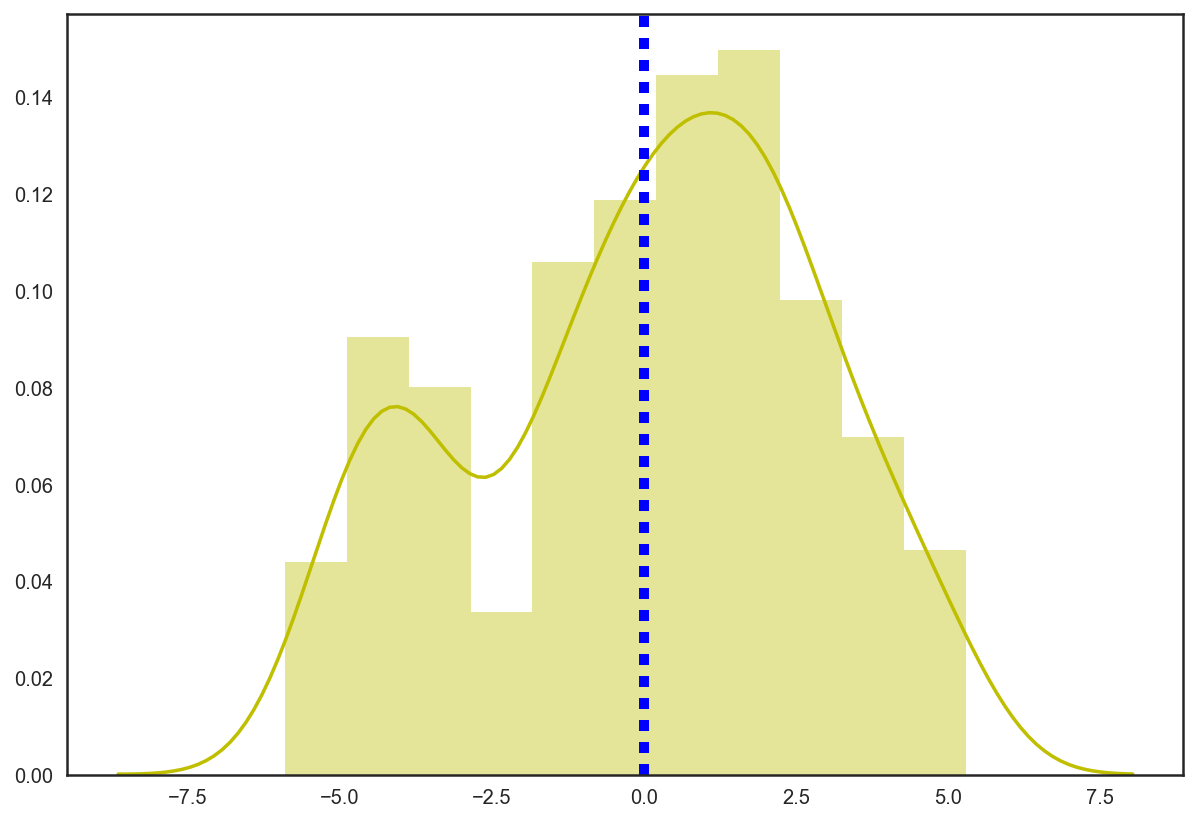

In [1606]:
np.mean(lm_stats_1.resid)
sns.distplot(lm_stats_1.resid, color='y')
plt.axvline(np.mean(lm_stats_1.resid), color='b', linestyle='dotted', linewidth=5)
plt.show()

In [1607]:
### Again we observe a very low R-squared. In this case only treatment seems to be significant and it seems to have a 
### negative effect on levels of optimism.

In [1608]:
### Now we take a look at reduction of household consumption 

In [1609]:
lm_stats_1 = smf.ols(formula='redhhcondummy ~  treatment + age + education + PlaceOfOrigin + familysize + tottime', data=jordan).fit()
print (lm_stats_1.summary())

                            OLS Regression Results                            
Dep. Variable:          redhhcondummy   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2.645
Date:                Mon, 27 Feb 2017   Prob (F-statistic):            0.00287
Time:                        17:36:50   Log-Likelihood:                -246.46
No. Observations:                 380   AIC:                             516.9
Df Residuals:                     368   BIC:                             564.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept           

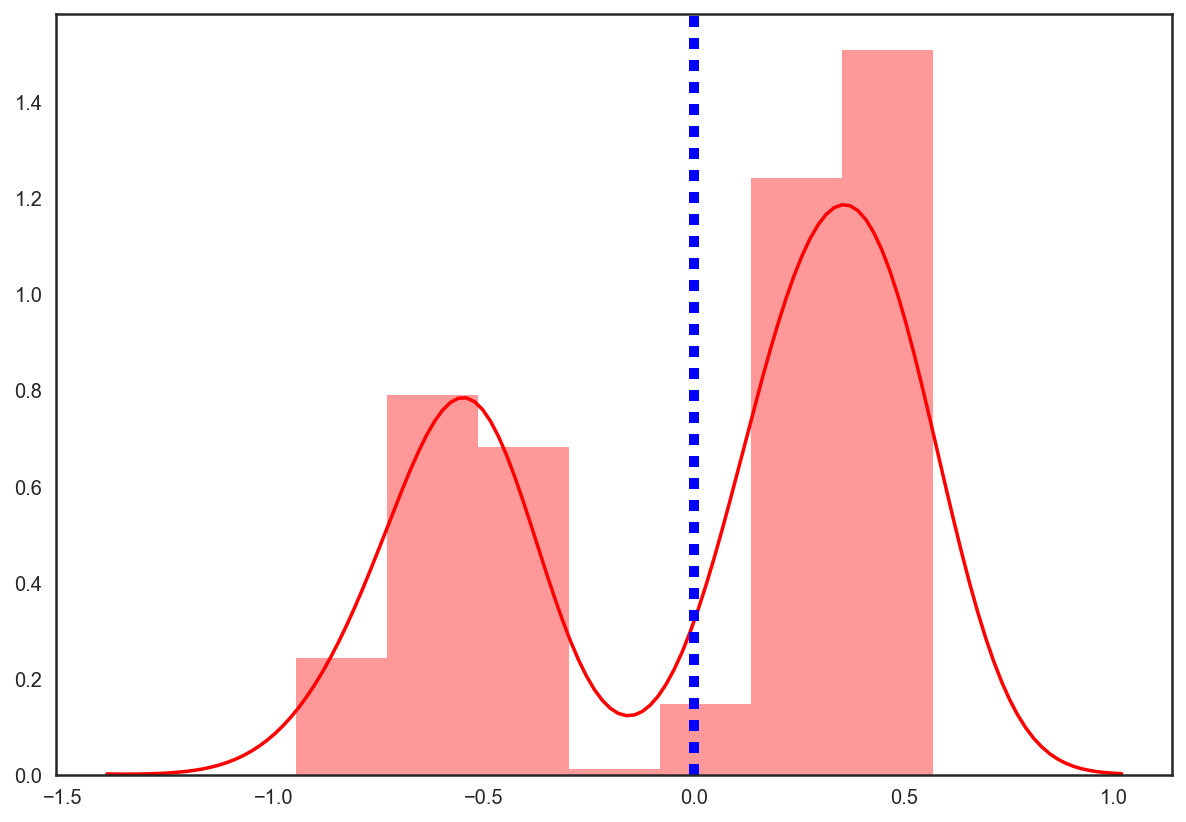

In [1610]:
np.mean(lm_stats_1.resid)
sns.distplot(lm_stats_1.resid, color='r')
plt.axvline(np.mean(lm_stats_1.resid), color='b', linestyle='dotted', linewidth=5)
plt.show()

In [1611]:
### We observe again a really small R-Squared. Treatment is again the only variable that seems to be significant.
### Also reintegreation seems to have a positive effect on the propensity of a family to reduce their levels
### of consumption

In [1612]:
### Report 

### 1. The current model offers very little in terms of explanatory power, however it provides an insight of the 
### possible effects that reintegration may have on our variables of interest. It is also important to mention that 
### these results do not contradict the results found in the analysis of our graphs and the distribution of our 
### variables between the two subsamples in the previous sections. 


### 2. Our analysis implies that the two sample are similar enough to conduct a more complicated analysis such as 
### covariate matching, this also implies that we may have a sample that is very similar to a representative sample.

## 3. Our analysis of the variables of interest in the other hand, implies that the situation in the different
### environments in which Syrian families live in Jordan may bevery different. To furthere explore it would be
### necessary to include more variables that allow us to compare the differences in the situation between the two
### samplegroup

### 4.While reintegration may offer better labor opportunities and higher wages, it also offers larger amount of 
### expenses, that may have to be covered entirely for the family. 

### 5. The Zaatari Camp, even though do not offer much labor opportunities provides an 
### environment in which families have their survival assured; families in this environment also have access to 
### several treatment such as psychological treatment and reallocation to european countries, this treatment and 
### policies might explain why the levels of optimism are actually larger for the for the families living in 
### Zaatari Camp.

